# Problem Statment

#### Is to minimize the risk of financial loss associated with lending to customers , Moreover, Identify patterns in the data to distinguish applicants capable of repaying loans from those likely to default.

In [103]:
# importing Libraies
import pandas as pd
pd.set_option('display.max_columns', None) 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mstats

In [104]:
# read the Data sets
application_data = pd.read_csv(r'D:\Data Science\internships\Loard_ai\week3_first_proj\application_data.csv')
prev_data = pd.read_csv(r'D:\Data Science\internships\Loard_ai\week3_first_proj\previous_application.csv')

In [105]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [106]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# info about application_data
application_data.shape

(307511, 122)

In [108]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [109]:
# Merge the two data frames on the 'SK_ID_CURR' column
merged_data = pd.merge(application_data, prev_data, on='SK_ID_CURR', how='inner')
merged_data.shape

(1413701, 158)

In [110]:
# Check if there duplicates
duplicates = merged_data.duplicated().sum()
duplicates

0

# 1.Preprocessing 

### Indentify missing data and deal with it

In [111]:
# The percentage of missing values in The Data set 
total_cells = np.product(merged_data.shape)
missing_cells = merged_data.isnull().sum()
percent = (missing_cells.sum() / total_cells)
print(f'The percentage of missing Data : {percent:.2%}') 

The percentage of missing Data : 22.84%


## 1.1 Working on columns that contain high percentage of missing data and drop them

In [112]:
# Detrmine the columns are having more than 40% of missing values

def missing_percentage(df):
    missing_table = pd.DataFrame(columns=['Column name','percentage'])
    num_records = df.shape[0]
    
    for col in df.columns:
        if df[col].isna().any():
            missing_val = df[col].isnull().sum()
            percent = (missing_val / num_records) * 100
            if percent.round() >= 40 :
                missing_table = missing_table.append({'Column name' :col , 'percentage' : percent} , ignore_index=True)
    return missing_table

In [113]:
missing_col = missing_percentage(merged_data)

C:\Users\Elsayedmohamedelsaye\AppData\Local\Temp\ipykernel_2940\2891128417.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_table = missing_table.append({'Column name' :col , 'percentage' : percent} , ignore_index=True)
C:\Users\Elsayedmohamedelsaye\AppData\Local\Temp\ipykernel_2940\2891128417.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_table = missing_table.append({'Column name' :col , 'percentage' : percent} , ignore_index=True)
C:\Users\Elsayedmohamedelsaye\AppData\Local\Temp\ipykernel_2940\2891128417.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  missing_table = missing_table.append({'Column name' :col , 'percentage' : percent} , ignore_index=True)
C:\Users\Elsayedmohamedelsaye\AppData

In [114]:
# sort them descending
missing_col.sort_values(by='percentage', ascending=False)

,Column name,percentage
51,RATE_INTEREST_PRIMARY,99.661102
52,RATE_INTEREST_PRIVILEGED,99.661102
34,COMMONAREA_MEDI,69.689347
6,COMMONAREA_AVG,69.689347
20,COMMONAREA_MODE,69.689347
28,NONLIVINGAPARTMENTS_MODE,69.296549
14,NONLIVINGAPARTMENTS_AVG,69.296549
42,NONLIVINGAPARTMENTS_MEDI,69.296549
44,FONDKAPREMONT_MODE,68.216264
12,LIVINGAPARTMENTS_AVG,68.214566


In [115]:
# Detrmine the columns with high missing percent and Drop these columns from the merged dataframe
drop_col = missing_col['Column name'].tolist()

# make copy first from the merged data
merged_copy = merged_data.copy()

merged_copy = merged_copy.drop(columns=drop_col)

print(f'Data shape after dropping columns : {merged_copy.shape}')

Data shape after dropping columns : (1413701, 98)


## 1.2 Check the columns which not helping in the analysis and drop them

In [116]:
# check the features that don't have significant impact on the analyses
numeric_col = merged_copy.select_dtypes(include='number').columns

selected_features = [col for col in numeric_col if col.startswith('FLAG')]

selected_features.append('TARGET')

selected_features

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'TARGET']

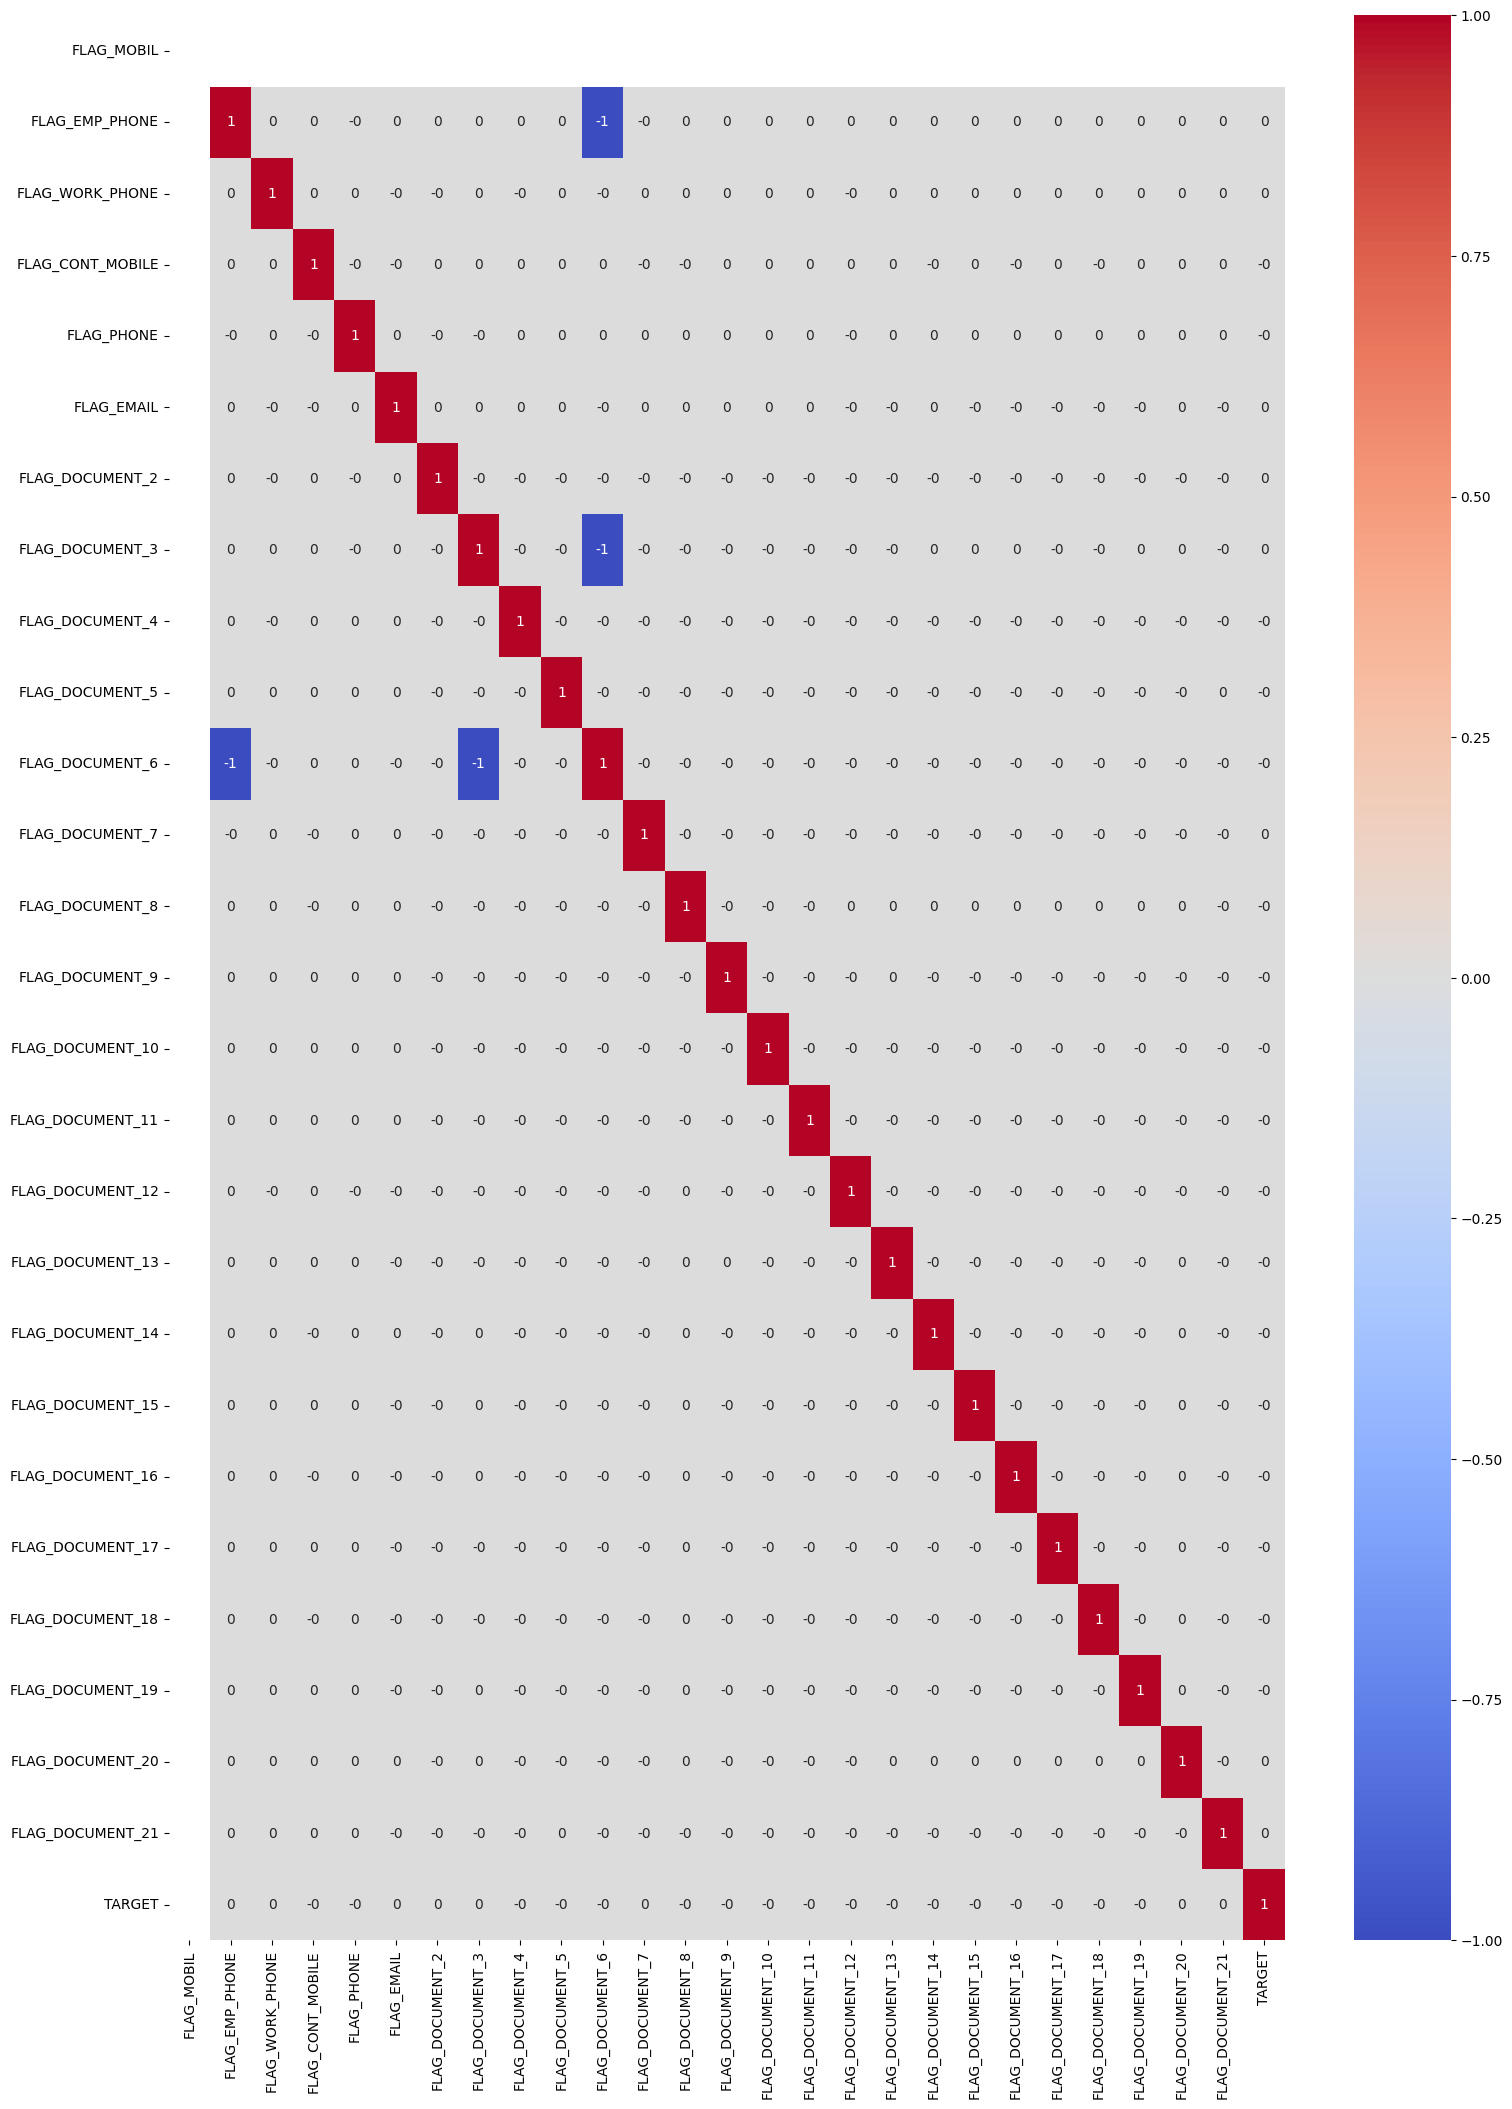

In [117]:
# Create a correlation matrix
corr_matrix = merged_copy[selected_features].corr().round()

# Create a heatmap
plt.figure(figsize=(18, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# plt.title("Correlation between 'TARGET' column and 'FLAG_' features ")

plt.show()

As it shows in the Heat map there is no significant impact from all those columns and the "TARGET" col,
Therefore, There is no reason for keeping those columns to enhance the analysis.

In [118]:
# pop the 'TARGET' col from those features
selected_features.remove('TARGET')

# drop the non valuable columns
merged_copy = merged_copy.drop(columns=selected_features)

print(f'Data shape after dropping columns : {merged_copy.shape}') 

Data shape after dropping columns : (1413701, 72)


#### After removing the non affective columns so the number of columns turns from ( 158 ) to ( 72 )

In [119]:
# Recheck the percentage of missing data then.
total_cells = np.product(merged_copy.shape)
missing_cells = merged_copy.isnull().sum()
percent = (missing_cells.sum() / total_cells)
print(f'The percentage of missing Data : {percent:.2%}')

The percentage of missing Data : 2.59%


#### so the total percentage of missing data turns from (22.84%) to ( 2.59% ) Now !!

now check the remaining missing values

In [120]:
# Function to check the missing data through the columns
def find_missing_values():
    col_with_missing = [col for col in merged_copy.columns
                       if merged_copy[col].isnull().any()]
    if not col_with_missing :
        print('There are no null values !!')
        
    else:
        for column in merged_copy[col_with_missing]:
            print(f' column {column} : {merged_copy[column].isna().sum()}')

In [121]:
# using check missing values function
find_missing_values()

 column AMT_ANNUITY_x : 93
 column AMT_GOODS_PRICE_x : 1208
 column NAME_TYPE_SUITE_x : 3526
 column OCCUPATION_TYPE : 457580
 column EXT_SOURCE_2 : 1821
 column EXT_SOURCE_3 : 241842
 column OBS_30_CNT_SOCIAL_CIRCLE : 3146
 column DEF_30_CNT_SOCIAL_CIRCLE : 3146
 column OBS_60_CNT_SOCIAL_CIRCLE : 3146
 column DEF_60_CNT_SOCIAL_CIRCLE : 3146
 column AMT_REQ_CREDIT_BUREAU_HOUR : 163627
 column AMT_REQ_CREDIT_BUREAU_DAY : 163627
 column AMT_REQ_CREDIT_BUREAU_WEEK : 163627
 column AMT_REQ_CREDIT_BUREAU_MON : 163627
 column AMT_REQ_CREDIT_BUREAU_QRT : 163627
 column AMT_REQ_CREDIT_BUREAU_YEAR : 163627
 column AMT_ANNUITY_y : 307218
 column AMT_CREDIT_y : 1
 column AMT_GOODS_PRICE_y : 319525
 column CNT_PAYMENT : 307213
 column PRODUCT_COMBINATION : 313


In [122]:
merged_copy.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [123]:
merged_copy[merged_copy['SK_ID_CURR'] == 100006 ]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,2078043,Cash loans,24246.00,675000.00,675000.0,675000.00,THURSDAY,15,Y,1,XNA,Approved,-181,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,2827850,Revolving loans,NaN,0.00,0.0,NaN,THURSDAY,15,Y,1,XAP,Canceled,-181,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Card Street
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,2190416,Consumer loans,29027.52,334917.00,267930.0,334917.00,SUNDAY,15,Y,1,XAP,Approved,-311,Cash through the bank,XAP,Repeater,Audio/Video,POS,XNA,Country-wide,8025,Consumer electronics,12.0,high,POS household with interest
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,1489396,Revolving loans,13500.00,270000.00,270000.0,270000.00,THURSDAY,15,Y,1,XAP,Approved,-181,XNA,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,1020698,Cash loans,39954.51,454500.00,481495.5,454500.00,SATURDAY,12,Y,1,XNA,Approved,-438,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,high,Cash X-Sell: high
10,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0

## 1.3 Replacing the null values with appropriate values working on columns in the above list

In [124]:
# using the descibe() func to check the values
OBS_30 ,DEF_30, OBS_60, DEF_60 = merged_copy['OBS_30_CNT_SOCIAL_CIRCLE'].describe(),merged_copy['DEF_30_CNT_SOCIAL_CIRCLE'].describe(),merged_copy['OBS_60_CNT_SOCIAL_CIRCLE'].describe(),merged_copy['DEF_60_CNT_SOCIAL_CIRCLE'].describe()
print(OBS_30 ,DEF_30, OBS_60, DEF_60 )

count    1.410555e+06
mean     1.544176e+00
std      2.530715e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      3.480000e+02
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64 count    1.410555e+06
mean     1.540436e-01
std      4.658973e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.400000e+01
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64 count    1.410555e+06
mean     1.526303e+00
std      2.508953e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      3.440000e+02
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64 count    1.410555e+06
mean     1.080426e-01
std      3.790588e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.400000e+01
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [125]:
# replace the null values with median = 0 
merged_copy['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0 , inplace = True)
merged_copy['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0 , inplace = True)
merged_copy['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0 , inplace = True)
merged_copy['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0 , inplace = True)

In [126]:
# working on (AMT_REQ_CREDIT_) columns 
a,b,c,d,e,f = merged_copy.groupby('AMT_REQ_CREDIT_BUREAU_HOUR').size(),merged_copy.groupby('AMT_REQ_CREDIT_BUREAU_DAY').size(),merged_copy.groupby('AMT_REQ_CREDIT_BUREAU_WEEK').size(),merged_copy.groupby('AMT_REQ_CREDIT_BUREAU_MON').size(),merged_copy.groupby('AMT_REQ_CREDIT_BUREAU_QRT').size(),merged_copy.groupby('AMT_REQ_CREDIT_BUREAU_YEAR').size()

print(a,b,c,d,e,f)

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    1242620
1.0       7188
2.0        236
3.0         26
4.0          4
dtype: int64 AMT_REQ_CREDIT_BUREAU_DAY
0.0    1242936
1.0       6432
2.0        376
3.0        175
4.0         82
5.0         22
6.0         28
9.0         23
dtype: int64 AMT_REQ_CREDIT_BUREAU_WEEK
0.0    1204584
1.0      43967
2.0        995
3.0        234
4.0        150
5.0         25
6.0         60
7.0          6
8.0         53
dtype: int64 AMT_REQ_CREDIT_BUREAU_MON
0.0     1019700
1.0      174059
2.0       28781
3.0       10414
4.0        5558
5.0        3239
6.0        1800
7.0        1595
8.0         932
9.0        1072
10.0        697
11.0        658
12.0        454
13.0        387
14.0        200
15.0        206
16.0        134
17.0         74
18.0         26
19.0         18
22.0         52
23.0          3
24.0          9
27.0          6
dtype: int64 AMT_REQ_CREDIT_BUREAU_QRT
0.0      949671
1.0      178090
2.0      102400
3.0       13810
4.0        4910
5.0         812
6.0   

In [127]:
# getting rid of null values in these columns 
merged_copy['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0 , inplace = True)
merged_copy['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0 , inplace = True)
merged_copy['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0 , inplace = True)
merged_copy['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0 , inplace = True)
merged_copy['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0 , inplace = True)
merged_copy['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(merged_copy['AMT_REQ_CREDIT_BUREAU_YEAR'].median() , inplace = True)

In [128]:
# work on AMT_ANNUITY_x column which is refers to the Loan annuity at time of request the loan
merged_copy['AMT_ANNUITY_x'].describe()

count    1.413608e+06
mean     2.701702e+04
std      1.395116e+04
min      1.615500e+03
25%      1.682100e+04
50%      2.492550e+04
75%      3.454200e+04
max      2.250000e+05
Name: AMT_ANNUITY_x, dtype: float64

In [129]:
merged_copy['AMT_ANNUITY_x'].fillna(merged_copy['AMT_ANNUITY_x'].median() , inplace = True)

In [130]:
# working on AMT_GOODS_PRICE_x column which describes the price of the goods for which the loan is given at time of request the loan
merged_copy['AMT_GOODS_PRICE_x'].describe()

count    1.412493e+06
mean     5.277186e+05
std      3.532465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE_x, dtype: float64

In [131]:
merged_copy['AMT_GOODS_PRICE_x'].fillna(merged_copy['AMT_GOODS_PRICE_x'].median() , inplace = True)

In [132]:
# working on OCCUPATION_TYPE Column replace the null values with (Not Mentioned)
merged_copy['OCCUPATION_TYPE'].fillna('Not Mentioned' , inplace = True)

In [133]:
merged_copy.groupby('OCCUPATION_TYPE').size().sort_values(ascending=False)

OCCUPATION_TYPE
Not Mentioned            457580
Laborers                 251299
Sales staff              151358
Core staff               118272
Managers                  94941
Drivers                   84067
High skill tech staff     48483
Accountants               41958
Medicine staff            39999
Security staff            31702
Cooking staff             28726
Cleaning staff            24328
Private service staff     12238
Low-skill Laborers         9320
Waiters/barmen staff       6132
Secretaries                5738
Realty agents              3544
HR staff                   2313
IT staff                   1703
dtype: int64

In [134]:
# working on EXT_SOURCE_2 & EXT_SOURCE_3 Columns 
EXT_2 , EXT_3 = merged_copy['EXT_SOURCE_2'].describe() , merged_copy['EXT_SOURCE_3'].describe()
print(EXT_2 , EXT_3)

count    1.411880e+06
mean     5.114275e-01
std      1.911188e-01
min      8.173617e-08
25%      3.890839e-01
50%      5.627679e-01
75%      6.606783e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64 count    1.171859e+06
mean     4.896986e-01
std      1.965360e-01
min      5.272652e-04
25%      3.441550e-01
50%      5.100895e-01
75%      6.479769e-01
max      8.960095e-01
Name: EXT_SOURCE_3, dtype: float64


In [135]:
# replace the null values with the mean (Normalized value between 0 - 1)
merged_copy['EXT_SOURCE_2'].fillna(merged_copy['EXT_SOURCE_2'].mean() , inplace = True)
merged_copy['EXT_SOURCE_3'].fillna(merged_copy['EXT_SOURCE_3'].mean() , inplace = True)

In [136]:
# work on AMT_ANNUITY_y column which is refers to the Loan annuity at prev applications
merged_copy['AMT_ANNUITY_y'].describe()

count    1.106483e+06
mean     1.583718e+04
std      1.472491e+04
min      0.000000e+00
25%      6.257858e+03
50%      1.122376e+04
75%      2.042078e+04
max      4.180581e+05
Name: AMT_ANNUITY_y, dtype: float64

In [137]:
merged_copy['AMT_ANNUITY_y'].fillna(merged_copy['AMT_ANNUITY_y'].median() , inplace = True)

In [138]:
# working on AMT_GOODS_PRICE_y column which describes the price of the goods for which the loan is given in prev applications
merged_copy['AMT_GOODS_PRICE_y'].describe()

count    1.094176e+06
mean     2.264512e+05
std      3.159376e+05
min      0.000000e+00
25%      4.982850e+04
50%      1.102455e+05
75%      2.295000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE_y, dtype: float64

In [139]:
merged_copy['AMT_GOODS_PRICE_y'].fillna(merged_copy['AMT_GOODS_PRICE_y'].median() , inplace = True)

In [140]:
# the NAME_TYPE_SUITE_x column refers to Who was accompanying client when he was applying for the loan when he submitt the application
merged_copy.groupby('NAME_TYPE_SUITE_x').size().sort_values(ascending=False)

NAME_TYPE_SUITE_x
Unaccompanied      1154378
Family              184261
Spouse, partner      46652
Children             13906
Other_B               6735
Other_A               3020
Group of people       1223
dtype: int64

In [141]:
merged_copy['NAME_TYPE_SUITE_x'].fillna('Unaccompanied' , inplace=True)

In [142]:
# Delaing with the 3 remaining columns
# drop CNT_PAYMENT column which is not usefull for analysis
merged_copy.drop('CNT_PAYMENT' , axis = 1 , inplace = True)

# Drop null values from ['AMT_CREDIT_y','PRODUCT_COMBINATION'] columns
columns_to_drop_na = ['AMT_CREDIT_y','PRODUCT_COMBINATION']
merged_copy.dropna(subset=columns_to_drop_na, inplace=True)


### Recheck the null values in the merged data

In [143]:
# Recheck the percentage of missing data then.
total_cells = np.product(merged_copy.shape)
missing_cells = merged_copy.isnull().sum()
percent = (missing_cells.sum() / total_cells)
print(f'The percentage of missing Data : {percent:.2%}')

The percentage of missing Data : 0.00%


### Missing Data is 0% !!!

#### After removing all null values NOW 


## 1.4 Check if there are any inconsistency or conflict in the data

In [144]:
# Detrmine the numerical columns 
Num_col = merged_copy.select_dtypes(include='number').columns
merged_copy[Num_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413387 entries, 0 to 1413700
Data columns (total 44 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413387 non-null  int64  
 1   TARGET                       1413387 non-null  int64  
 2   CNT_CHILDREN                 1413387 non-null  int64  
 3   AMT_INCOME_TOTAL             1413387 non-null  float64
 4   AMT_CREDIT_x                 1413387 non-null  float64
 5   AMT_ANNUITY_x                1413387 non-null  float64
 6   AMT_GOODS_PRICE_x            1413387 non-null  float64
 7   REGION_POPULATION_RELATIVE   1413387 non-null  float64
 8   DAYS_BIRTH                   1413387 non-null  int64  
 9   DAYS_EMPLOYED                1413387 non-null  int64  
 10  DAYS_REGISTRATION            1413387 non-null  float64
 11  DAYS_ID_PUBLISH              1413387 non-null  int64  
 12  CNT_FAM_MEMBERS              1413387 non-n

In [145]:
# detrmine the Categorical columns
categorical_col = merged_copy.select_dtypes(exclude = 'number').columns
merged_copy[categorical_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413387 entries, 0 to 1413700
Data columns (total 27 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   NAME_CONTRACT_TYPE_x          1413387 non-null  object
 1   CODE_GENDER                   1413387 non-null  object
 2   FLAG_OWN_CAR                  1413387 non-null  object
 3   FLAG_OWN_REALTY               1413387 non-null  object
 4   NAME_TYPE_SUITE_x             1413387 non-null  object
 5   NAME_INCOME_TYPE              1413387 non-null  object
 6   NAME_EDUCATION_TYPE           1413387 non-null  object
 7   NAME_FAMILY_STATUS            1413387 non-null  object
 8   NAME_HOUSING_TYPE             1413387 non-null  object
 9   OCCUPATION_TYPE               1413387 non-null  object
 10  WEEKDAY_APPR_PROCESS_START_x  1413387 non-null  object
 11  ORGANIZATION_TYPE             1413387 non-null  object
 12  NAME_CONTRACT_TYPE_y          1413387 non-

So there are 71 Columns 27 are object Data type , 20 are int and 24 are float

Now determing the columns which have meaningless values like ('XNA','XAP') and replace it

In [146]:
columnss = [col for col in merged_copy[categorical_col]
           if merged_copy[col].isin(['XNA','XAP']).any() ]
columnss

['CODE_GENDER',
 'ORGANIZATION_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

In [147]:
# check the values counting
for val in merged_copy[columnss]:
    print(merged_copy.groupby(val).size().sort_values(ascending=False))

CODE_GENDER
F      954950
M      458382
XNA        55
dtype: int64
ORGANIZATION_TYPE
Business Entity Type 3    304812
XNA                       273562
Self-employed             183050
Other                      73503
Medicine                   52078
Business Entity Type 2     46388
Government                 45732
School                     38999
Trade: type 7              37238
Kindergarten               31353
Construction               29710
Business Entity Type 1     25475
Transport: type 4          24605
Security                   15607
Industry: type 3           15245
Industry: type 9           14700
Housing                    13705
Trade: type 3              13665
Industry: type 11          12128
Military                   11580
Trade: type 2              11098
Agriculture                10780
Bank                       10684
Police                     10346
Postal                     10065
Transport: type 2           9171
Security Ministries         8431
Restaurant              

#### after observing the columns then replace those strange values with appropirate ones

In [148]:
# Replace 'XNA' with 'F' in the 'CODE_GENDER' column
merged_copy['CODE_GENDER'].replace('XNA', 'F', inplace=True)


# Replace 'XNA' with 'Other' in the 'ORGANIZATION_TYPE' column
merged_copy['ORGANIZATION_TYPE'].replace('XNA', 'Other', inplace=True)


# Replace 'XNA' and 'XAP' with 'Other' in the 'NAME_CASH_LOAN_PURPOSE' column
replace_dict = {'XNA': 'Other', 'XAP': 'Other'}
merged_copy['NAME_CASH_LOAN_PURPOSE'].replace(replace_dict, inplace=True)


# Replace 'XNA' with 'Cash through the bank' in the 'NAME_PAYMENT_TYPE' column
merged_copy['NAME_PAYMENT_TYPE'].replace('XNA', 'Cash through the bank', inplace=True)


# Replace 'XNA' and 'XAP' with 'Not Rejected' in the 'CODE_REJECT_REASON' column
replace_dict_code = {'XNA': 'Not Rejected', 'XAP': 'Not Rejected'}
merged_copy['CODE_REJECT_REASON'].replace(replace_dict_code, inplace=True)


# Replace 'XNA' with 'New' in the 'NAME_CLIENT_TYPE' column
merged_copy['NAME_CLIENT_TYPE'].replace('XNA', 'New', inplace=True)


# Replace 'XNA' with 'Other' in the 'NAME_GOODS_CATEGORY' column
merged_copy['NAME_GOODS_CATEGORY'].replace('XNA', 'Other', inplace=True)


# Replace 'XNA' with 'Not Mentioned' in the 'NAME_PORTFOLIO' column
merged_copy['NAME_PORTFOLIO'].replace('XNA', 'Not Mentioned', inplace=True)


# Replace 'XNA' with 'Not Mentioned' in the 'NAME_PRODUCT_TYPE' column
merged_copy['NAME_PRODUCT_TYPE'].replace('XNA', 'Not Mentioned', inplace=True)


# Replace 'XNA' with 'Not Mentioned' in the 'NAME_SELLER_INDUSTRY' column
merged_copy['NAME_SELLER_INDUSTRY'].replace('XNA', 'Not Mentioned', inplace=True)


# Replace 'XNA' with 'middle' in the 'NAME_YIELD_GROUP' column
merged_copy['NAME_YIELD_GROUP'].replace('XNA', 'middle', inplace=True)

#### After replacing the strange values check again if exist any of them or not 

In [149]:
columnss = [col for col in merged_copy[categorical_col]
           if merged_copy[col].isin(['XNA','XAP']).any() ]
columnss

[]

### working on Days Columns to convert the neg values to a year value

In [150]:
numeric_col = merged_copy.select_dtypes(include='number').columns

selected_features = [col for col in numeric_col if col.startswith('DAYS_')]
selected_features

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_DECISION']

In [151]:
merged_copy[selected_features] = merged_copy[selected_features].abs() 

In [152]:
merged_copy[selected_features]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_DECISION
0,9461,637,3648.0,2120,1134.0,606
1,16765,1188,1186.0,291,828.0,746
2,16765,1188,1186.0,291,828.0,828
3,16765,1188,1186.0,291,828.0,2341
4,19046,225,4260.0,2531,815.0,815
...,...,...,...,...,...,...
1413696,16856,1262,5128.0,410,787.0,648
1413697,16856,1262,5128.0,410,787.0,456
1413698,16856,1262,5128.0,410,787.0,171
1413699,16856,1262,5128.0,410,787.0,787


## --------------------------------------------------------

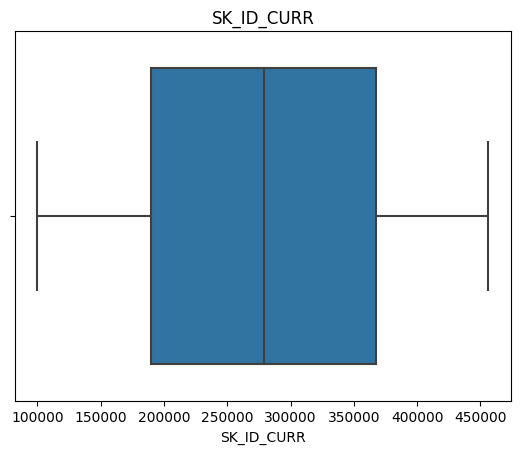

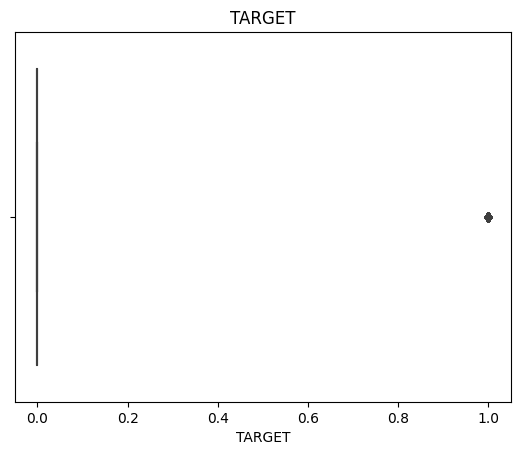

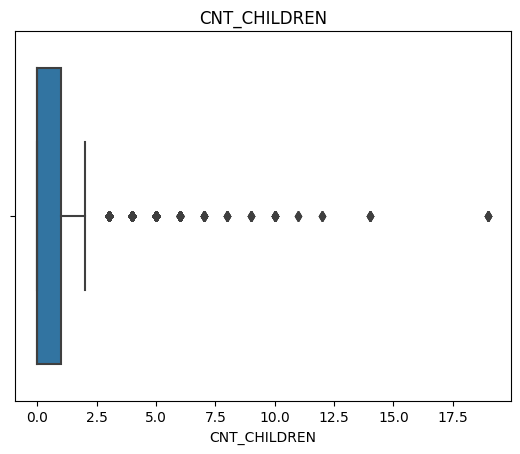

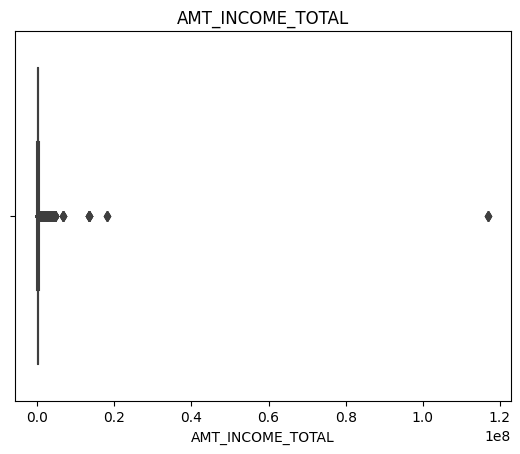

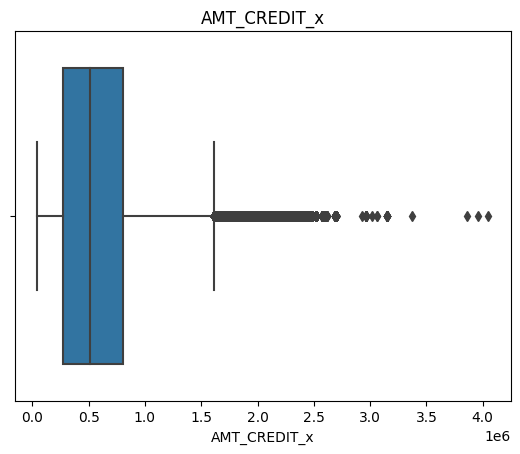

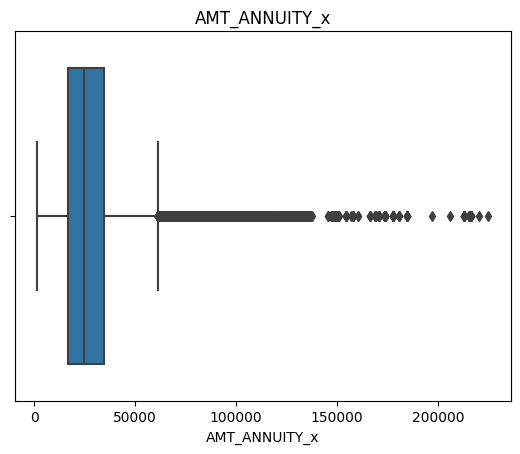

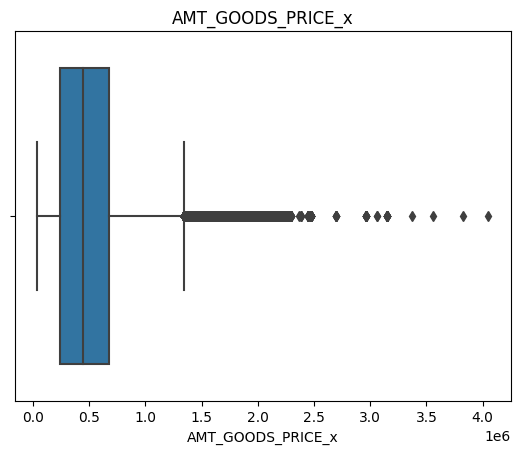

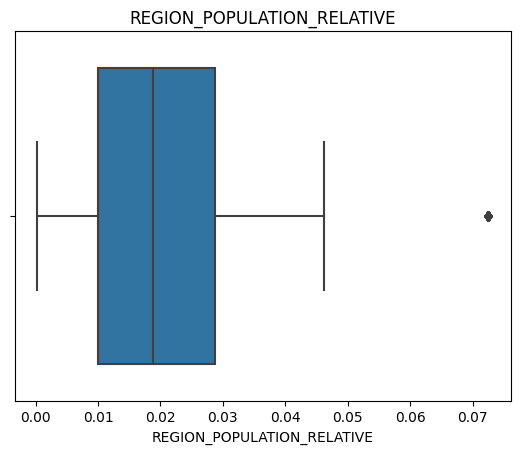

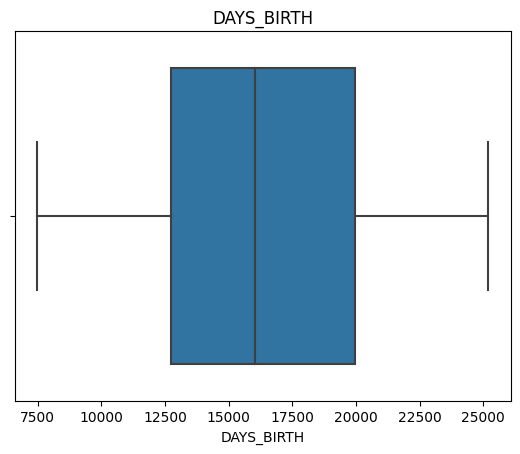

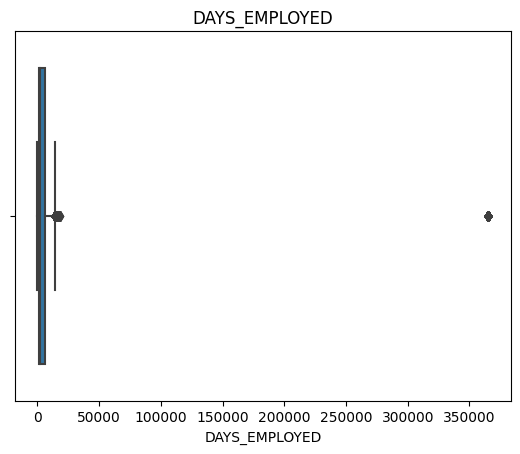

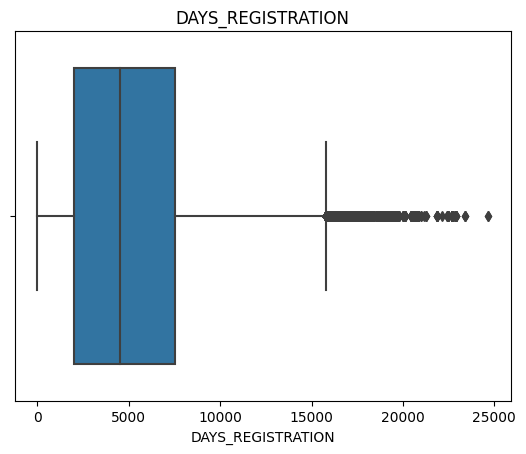

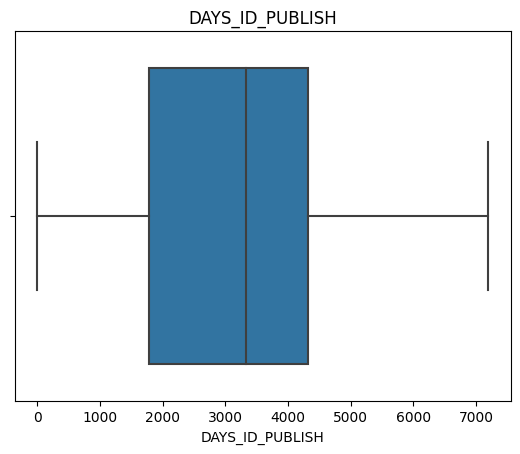

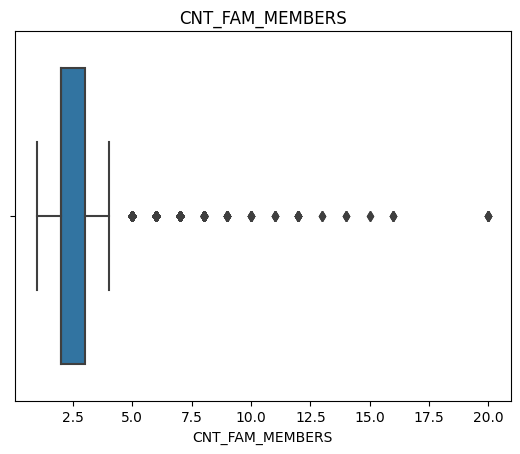

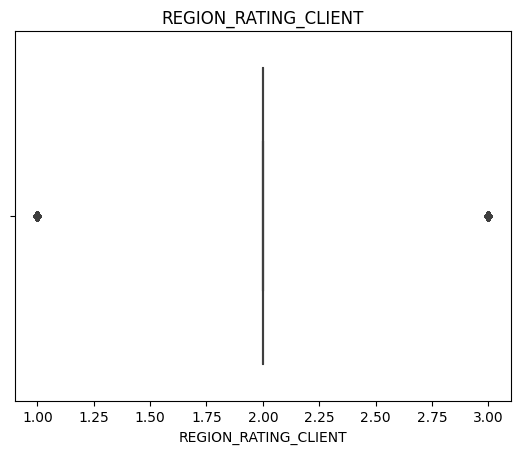

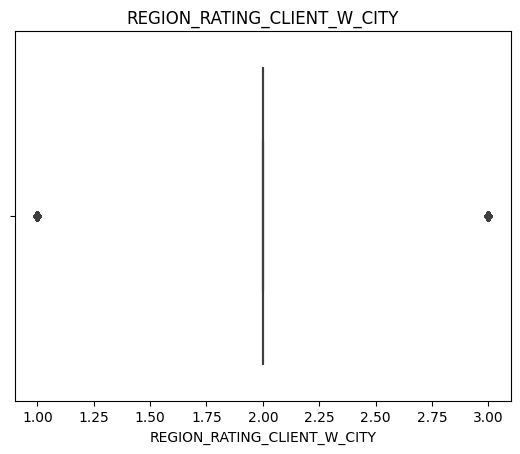

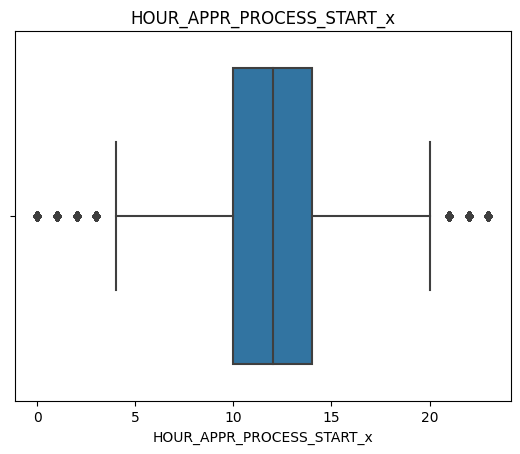

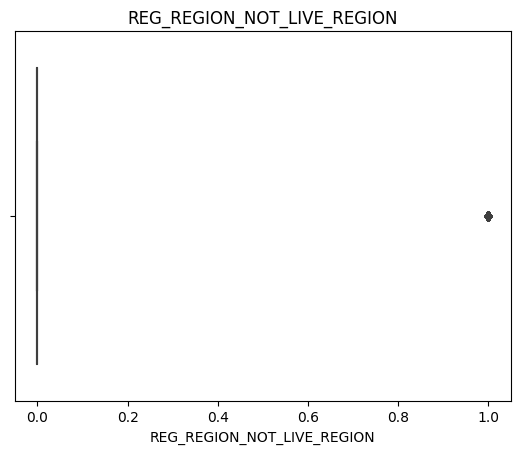

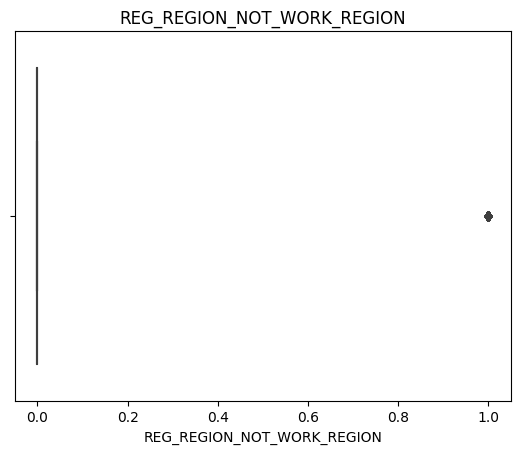

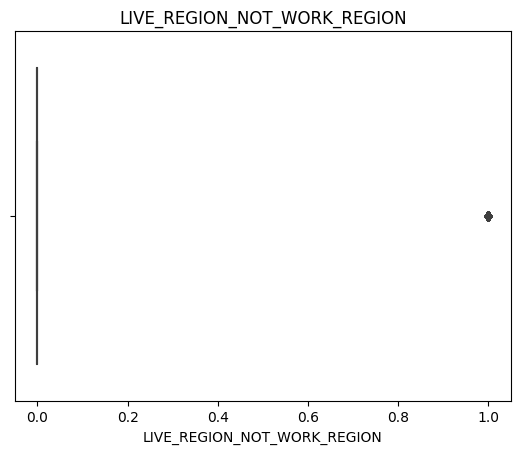

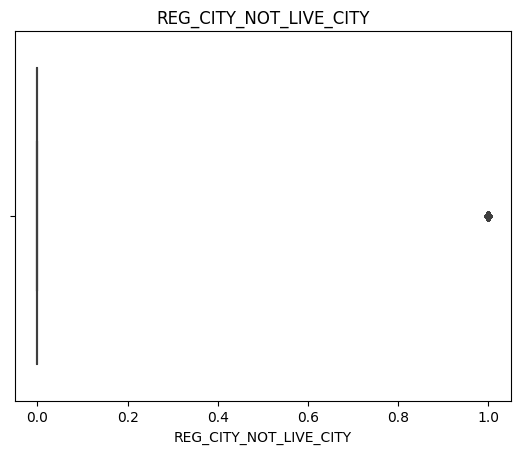

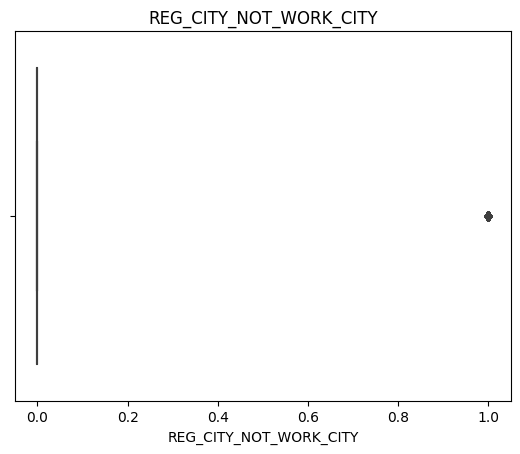

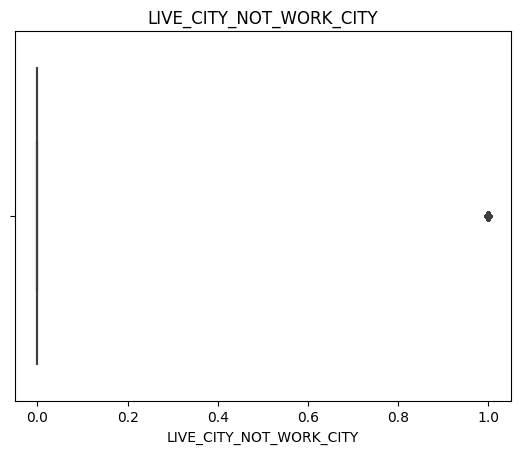

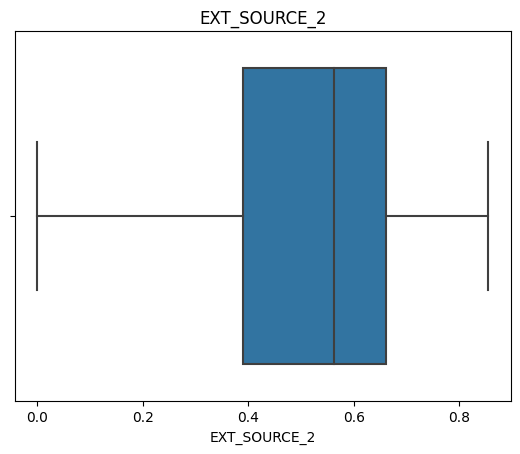

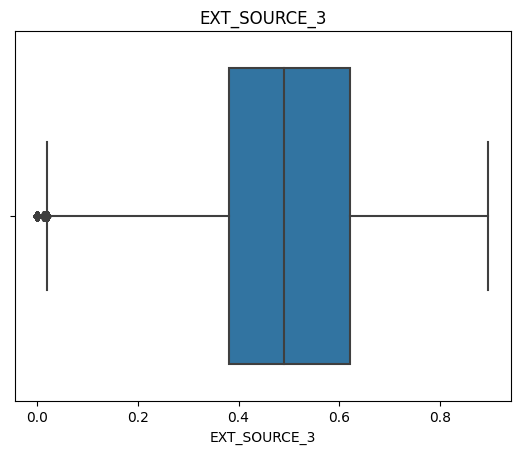

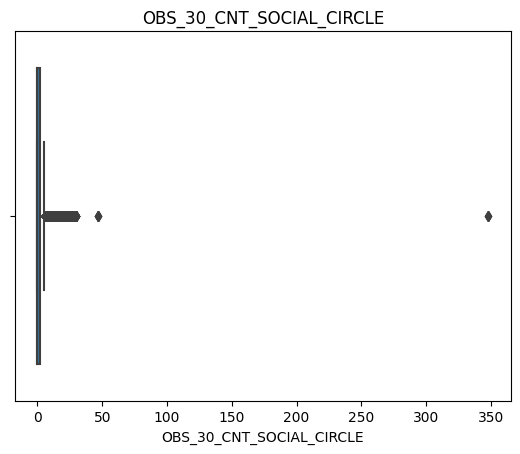

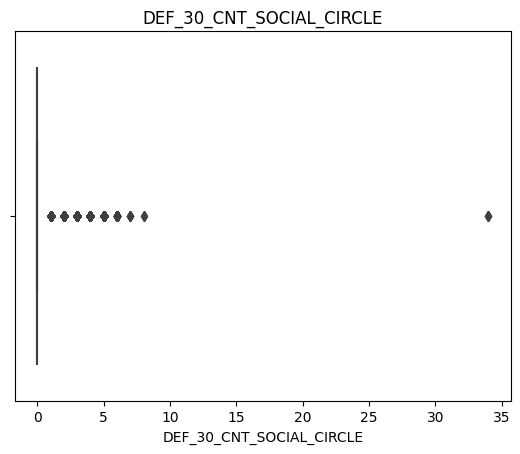

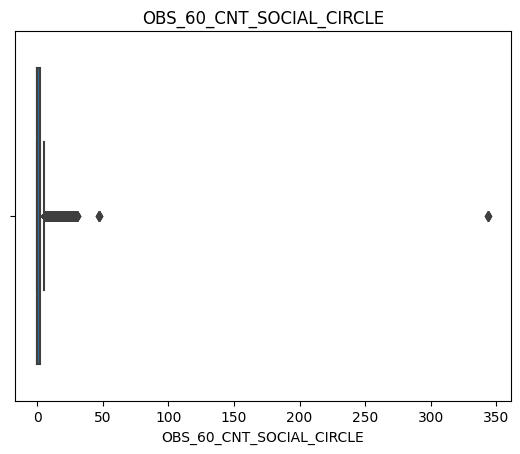

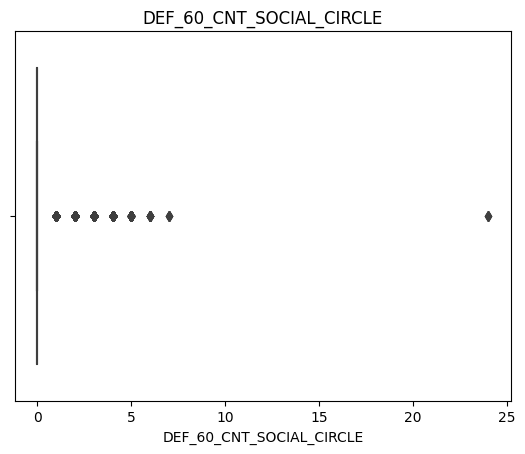

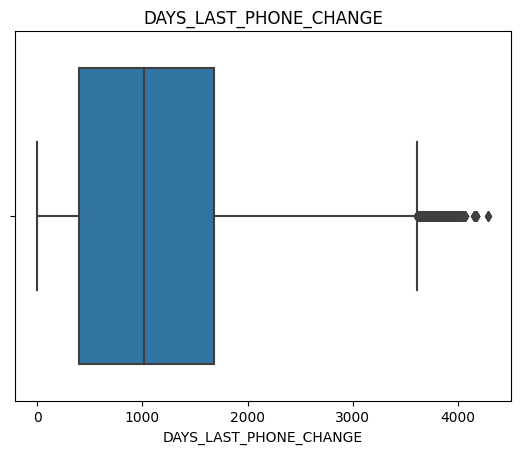

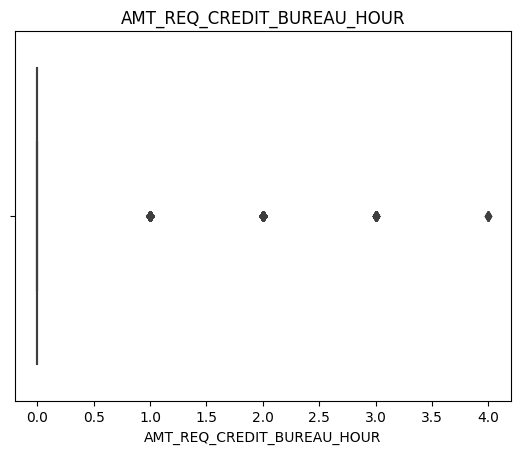

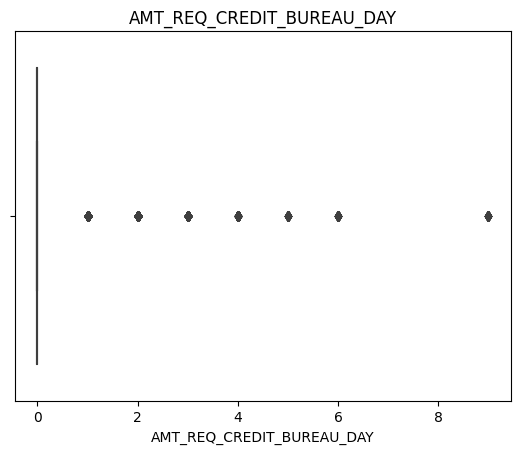

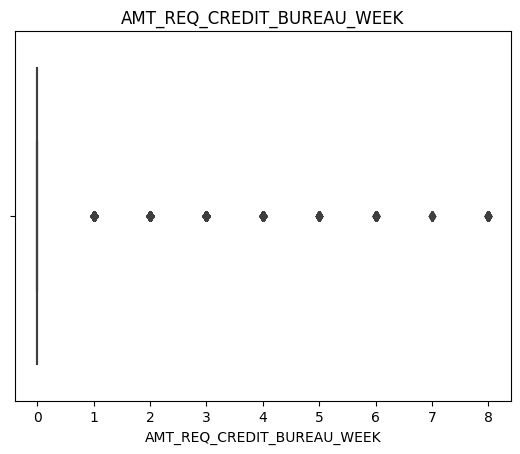

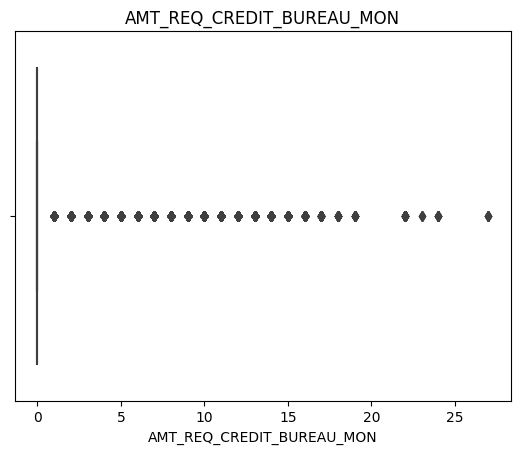

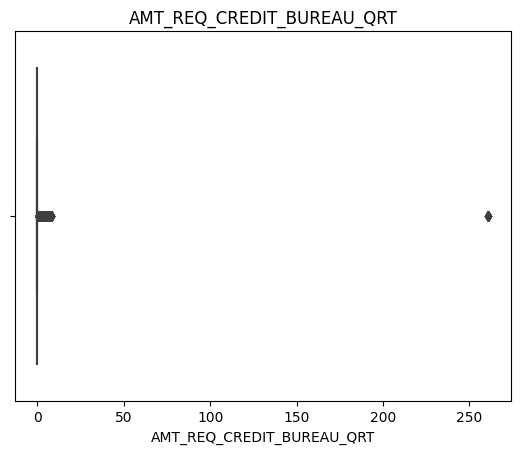

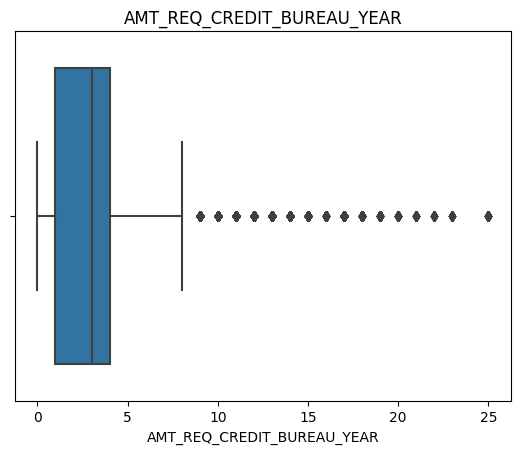

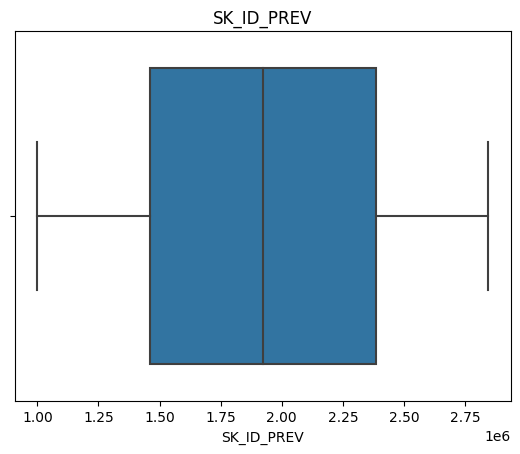

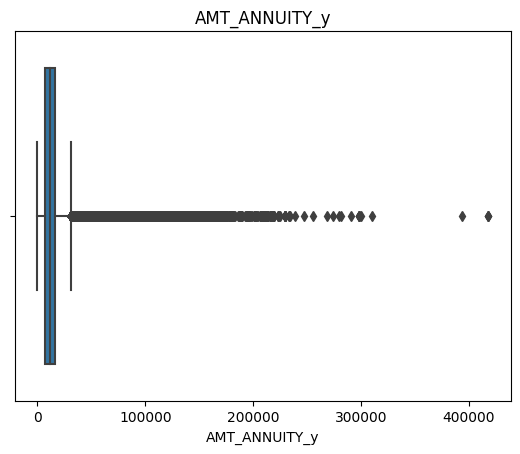

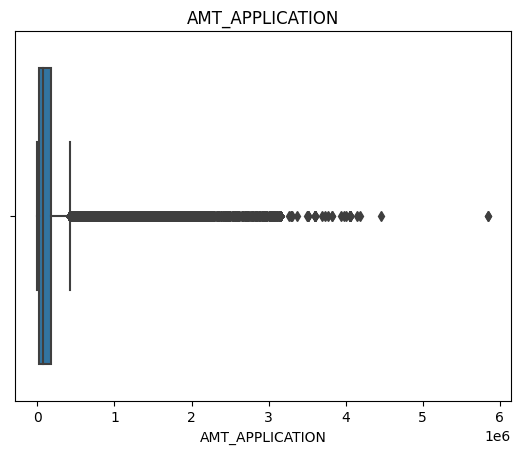

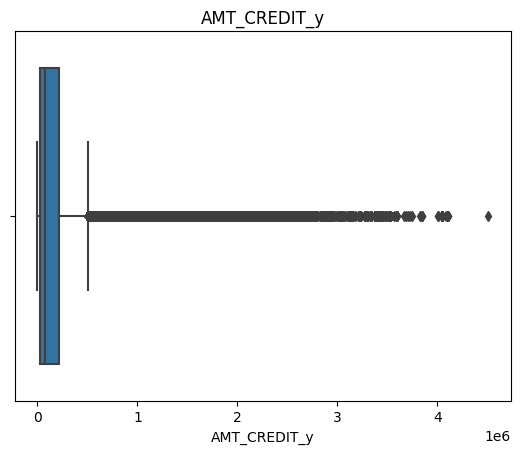

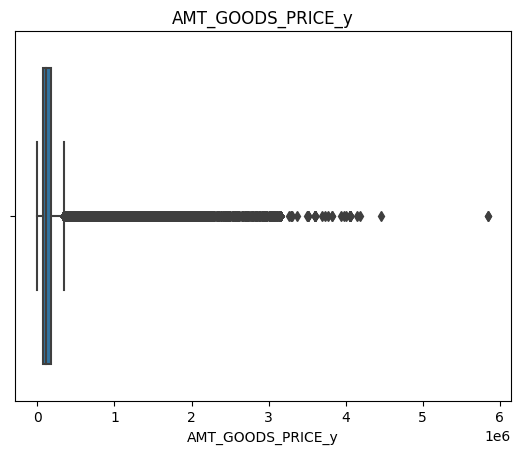

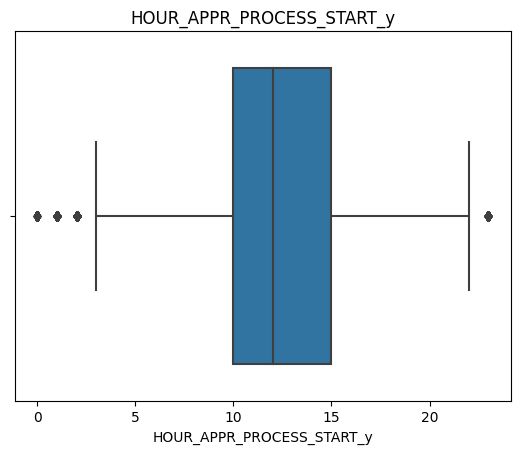

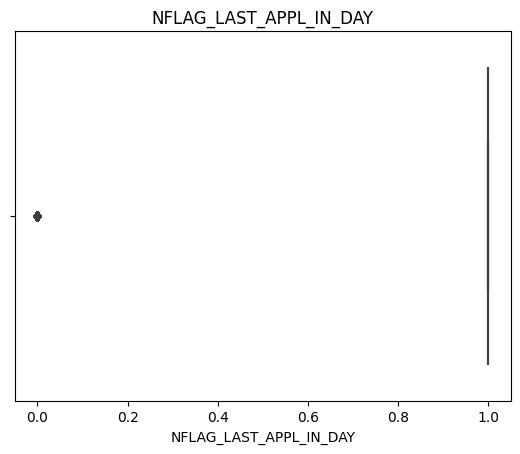

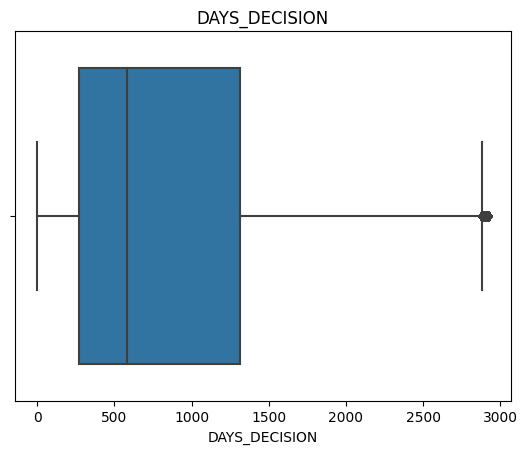

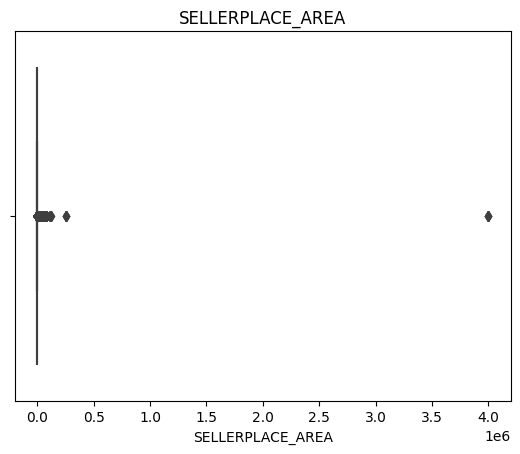

In [153]:
# show the boxplot of the data
for col in Num_col:
    sns.boxplot(x=merged_copy[col])
    plt.title(col)
    plt.show()

## 1.5 handling with the outliers

using with this a winsorization method

In [154]:
# Winsorize the numerical columns
merged_copy[Num_col] = merged_copy[Num_col].apply(lambda x: mstats.winsorize(x, limits=[0.05, 0.05]))

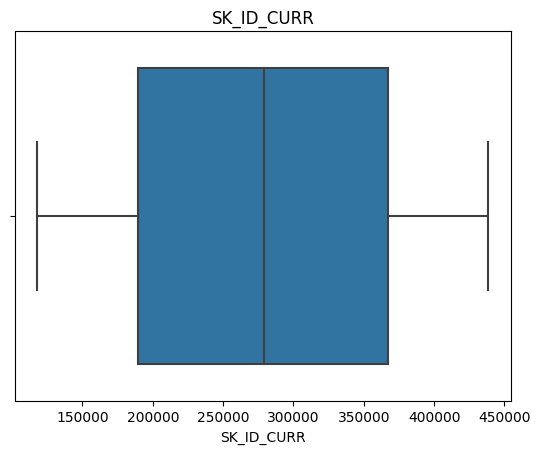

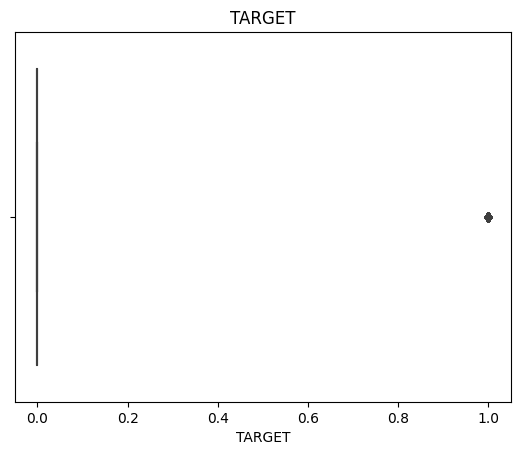

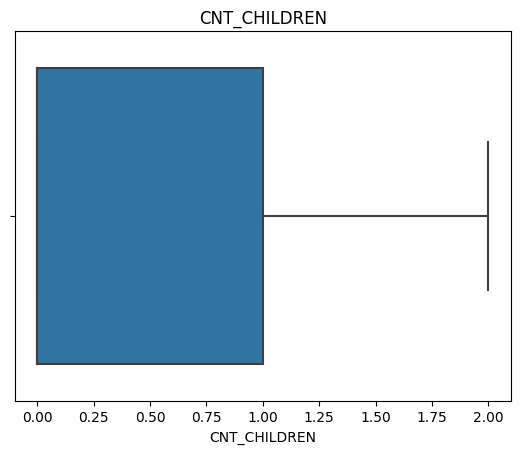

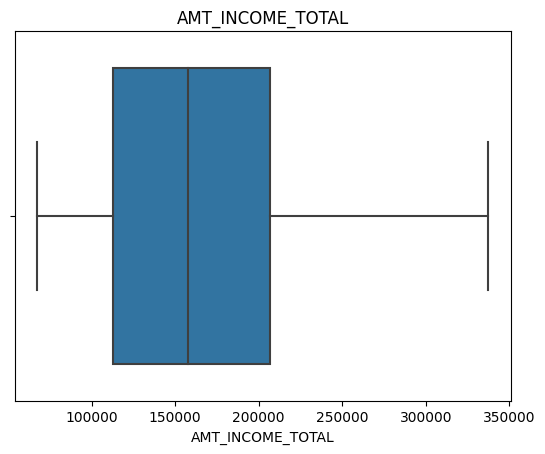

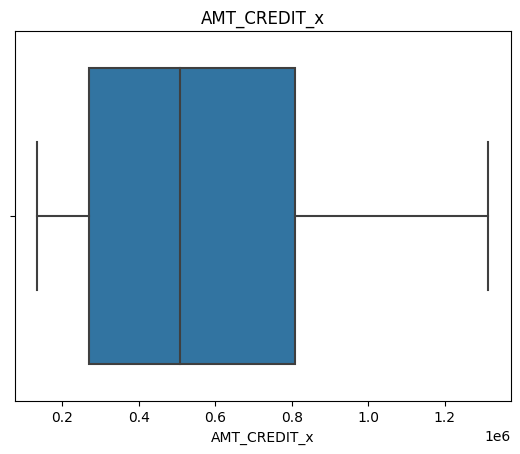

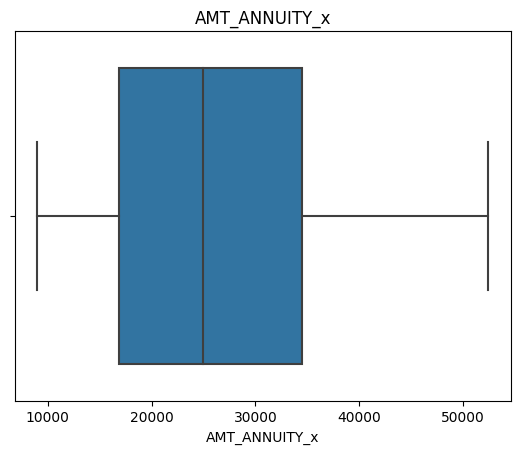

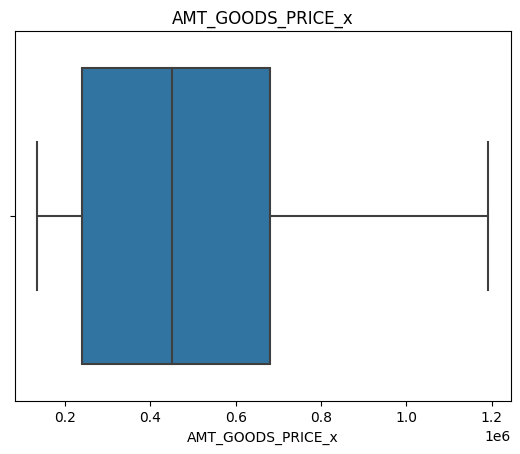

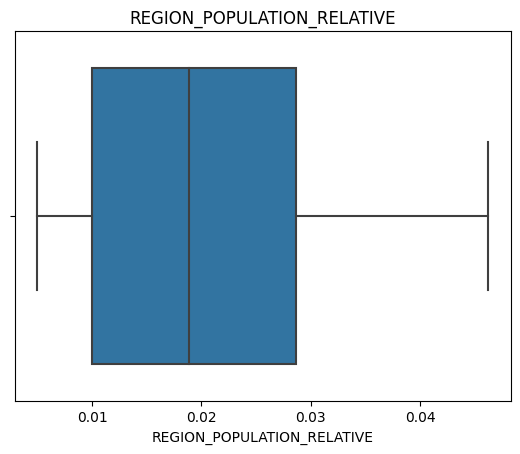

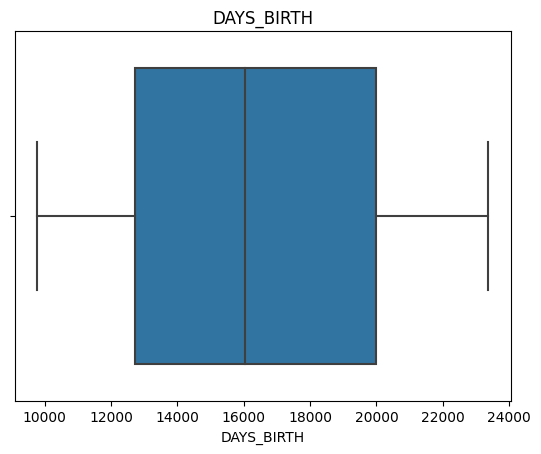

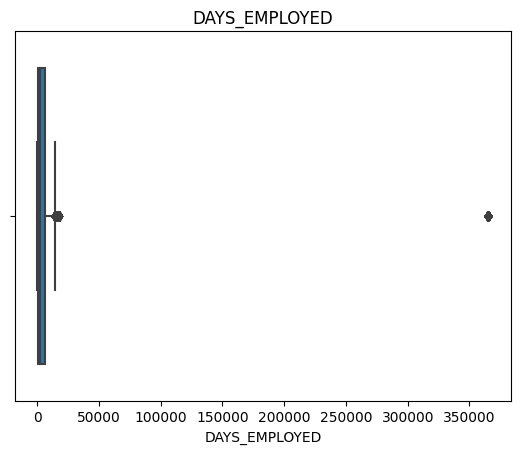

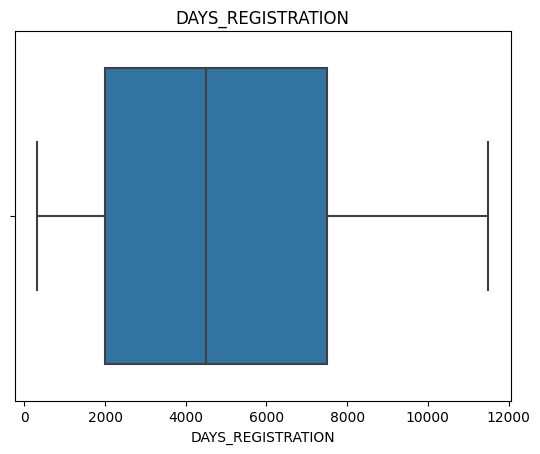

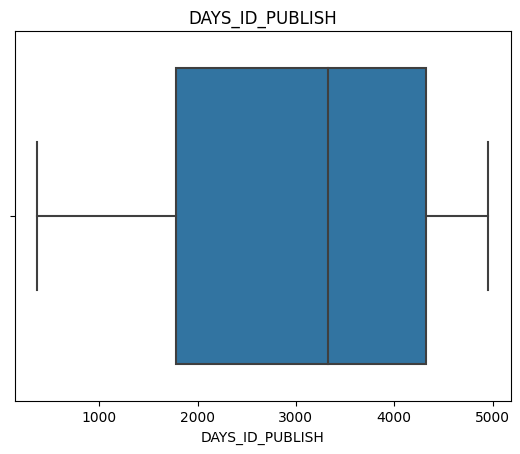

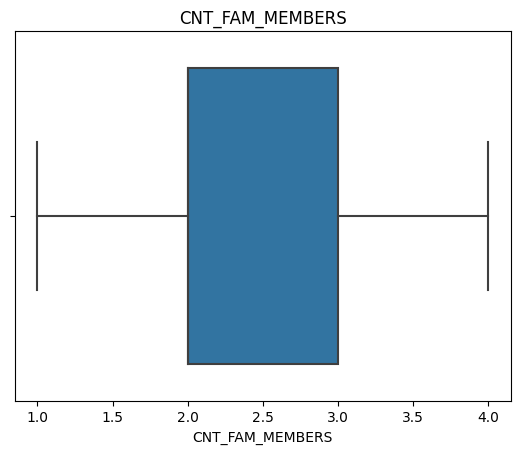

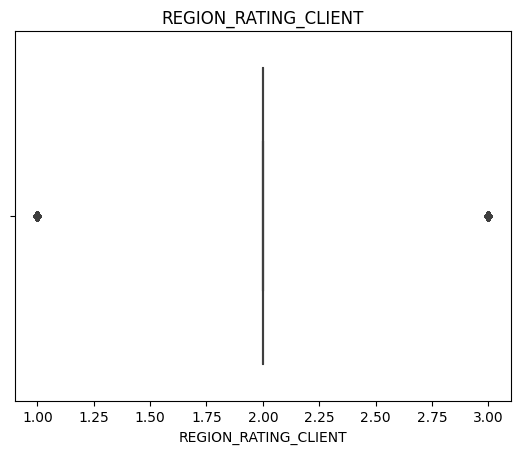

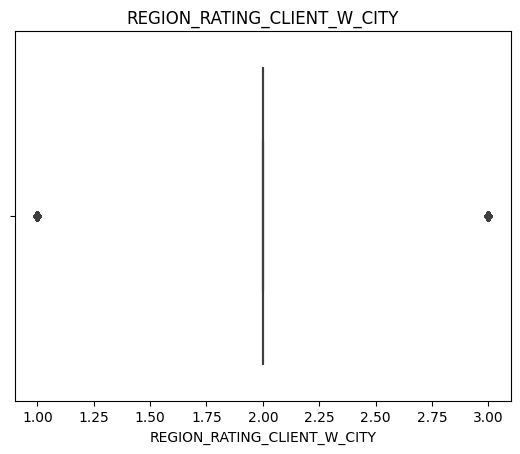

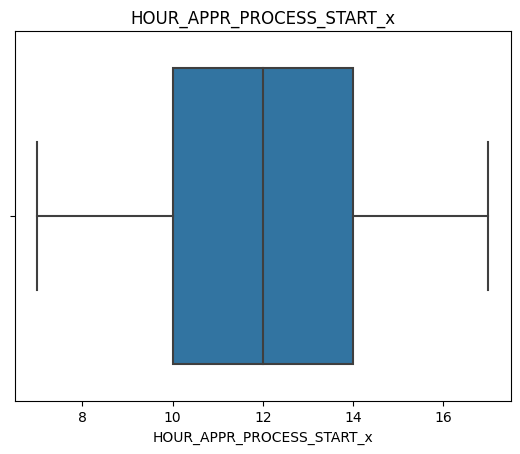

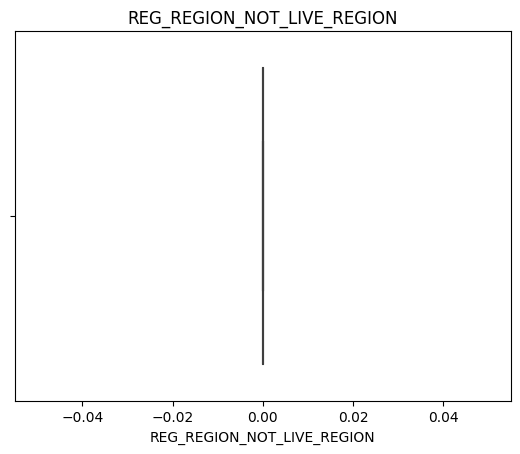

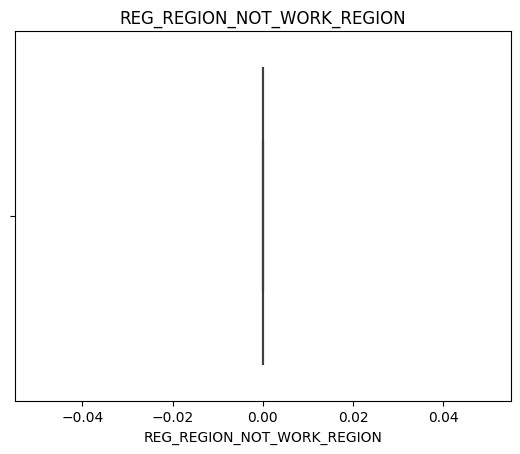

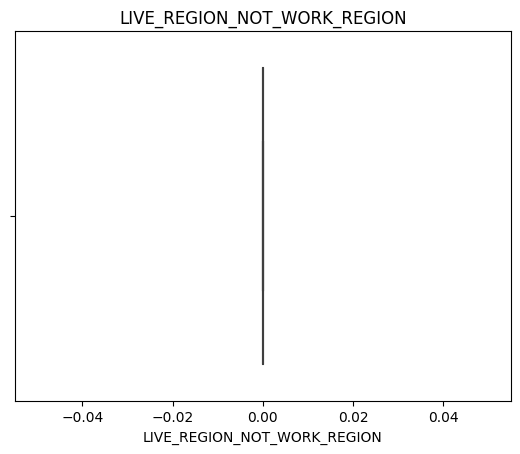

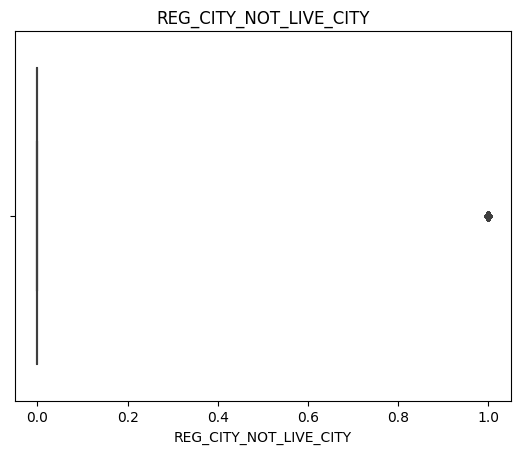

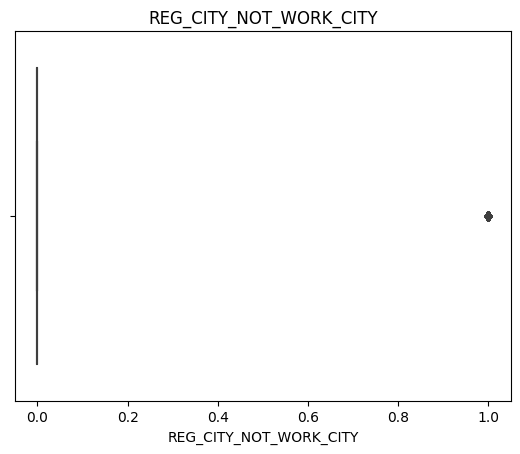

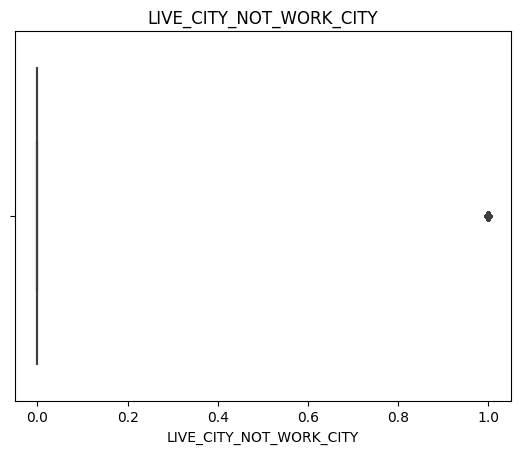

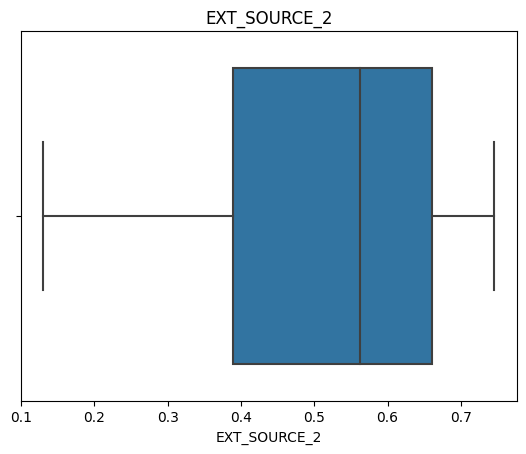

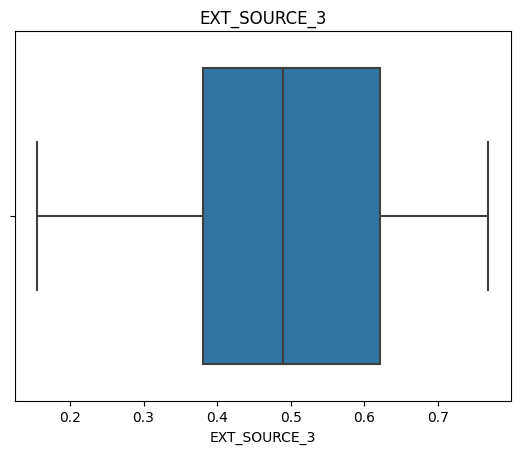

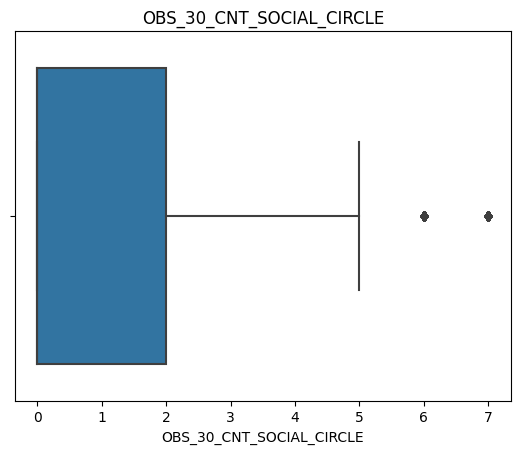

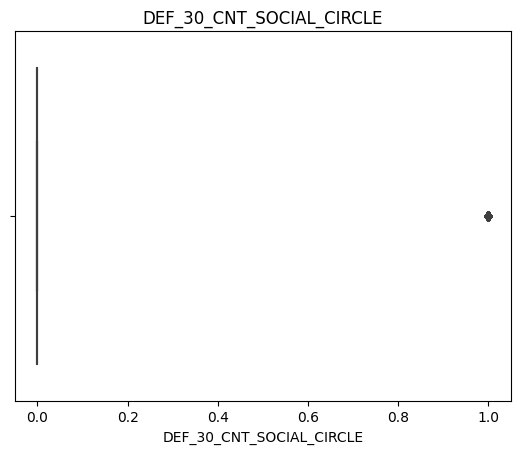

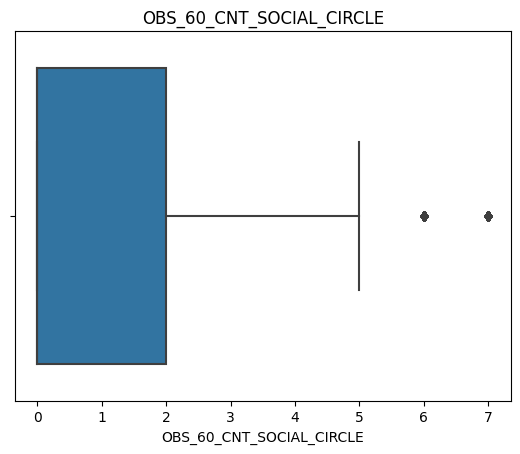

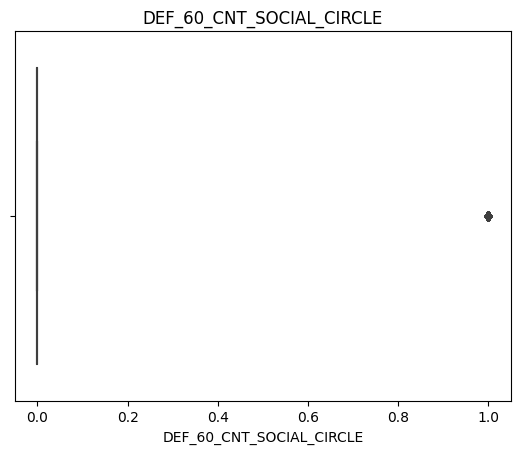

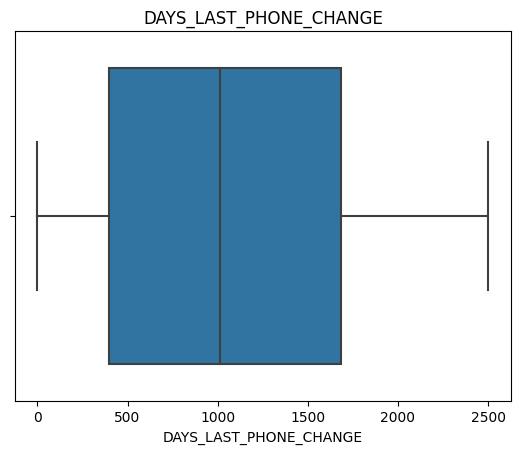

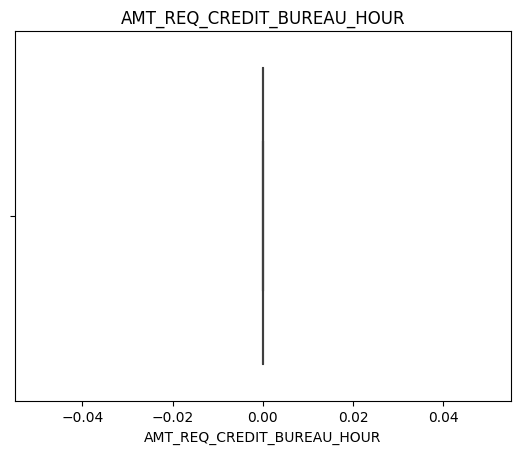

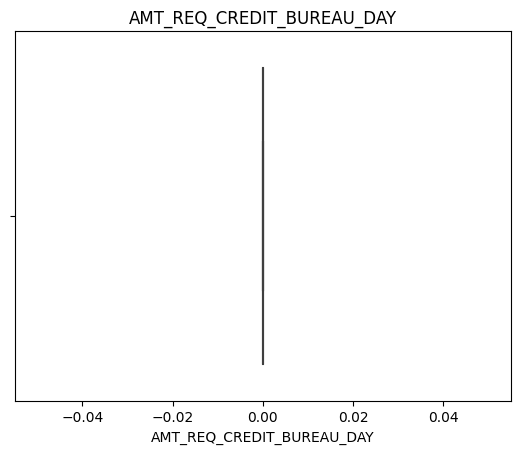

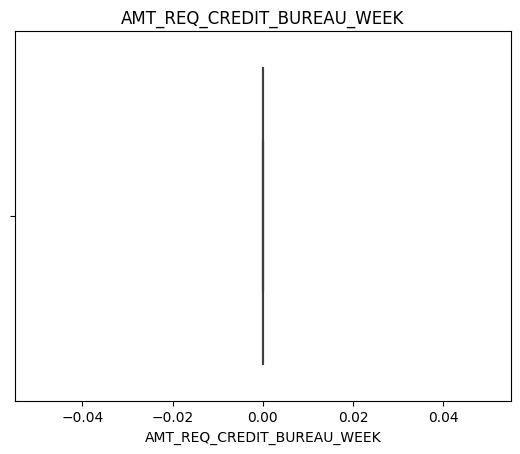

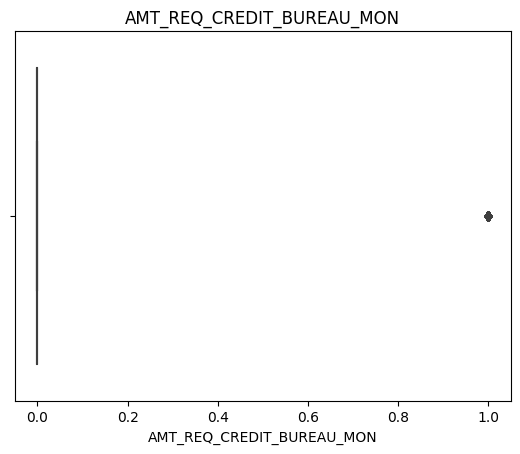

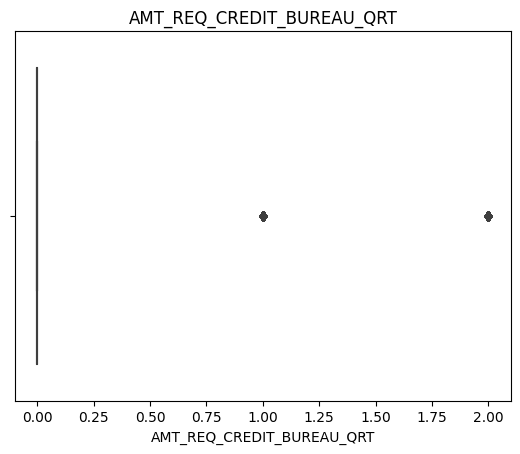

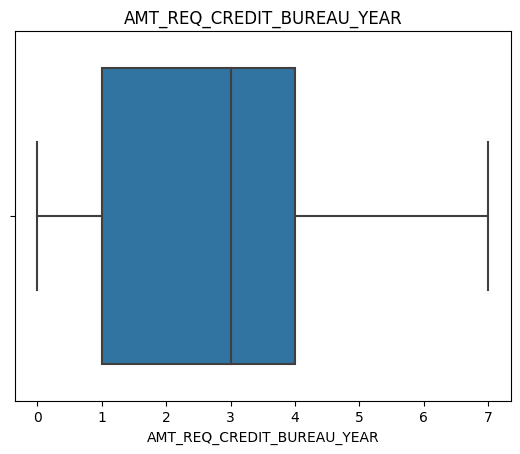

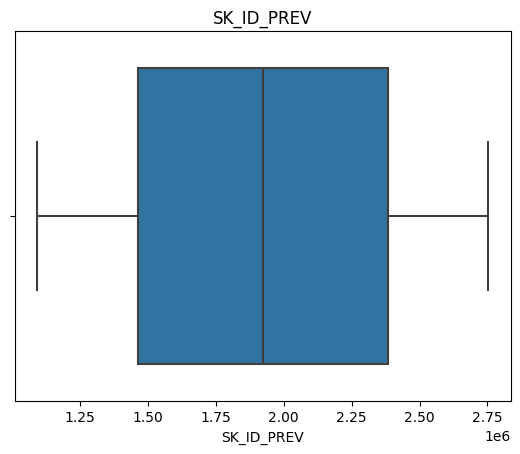

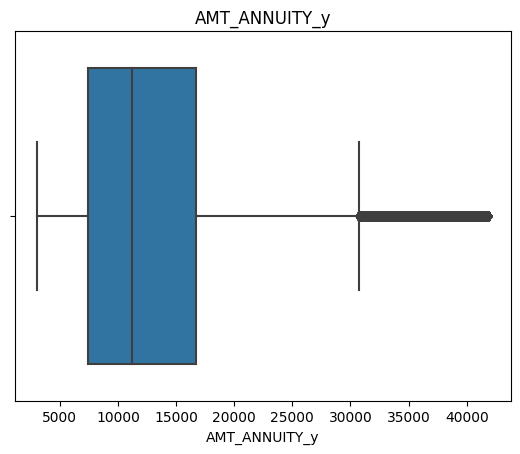

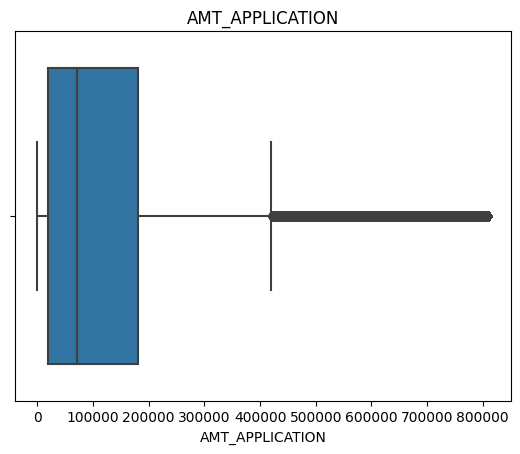

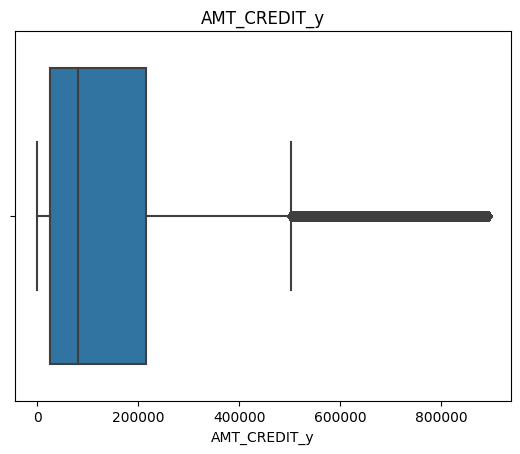

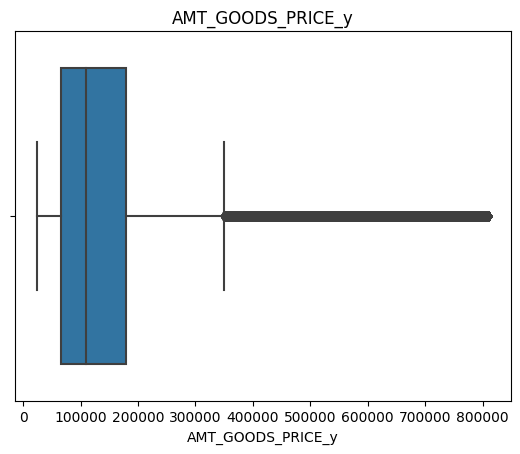

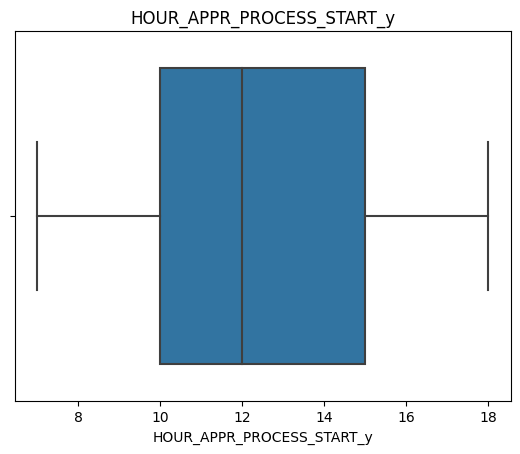

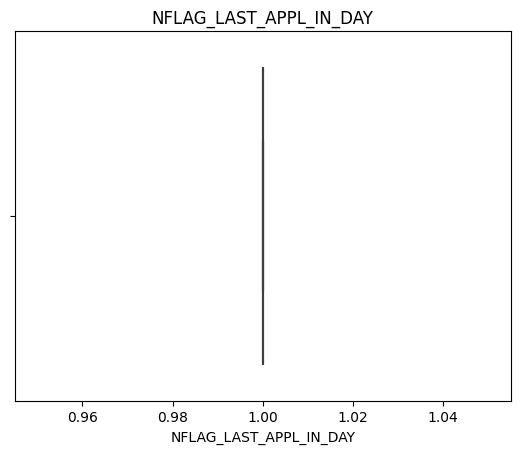

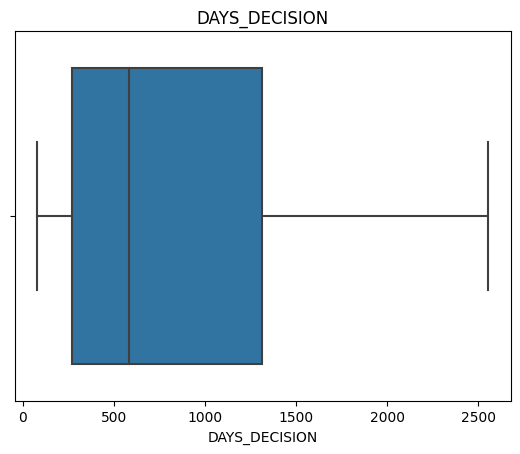

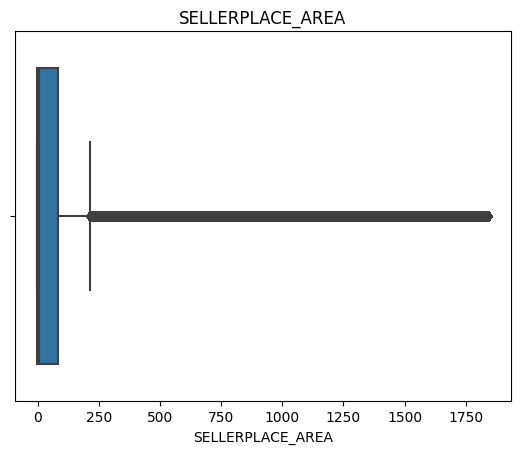

In [155]:
for col in Num_col:
    sns.boxplot(x=merged_copy[col])
    plt.title(col)
    plt.show()

In [156]:
merged_copy.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,117998,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9786,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.155689,2.0,1.0,2.0,1.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1092425,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,Other,Approved,606,Cash through the bank,Not Rejected,New,Vehicles,POS,Not Mentioned,Stone,500,Auto technology,low_normal,POS other with interest
1,117998,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.005002,16765,1188,1186.0,372,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.489699,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,41858.910,809955.0,893398.5,810000.0,FRIDAY,12,Y,1,Other,Approved,746,Cash through the bank,Not Rejected,Repeater,Other,Cash,x-sell,Credit and cash offices,-1,Not Mentioned,low_normal,Cash X-Sell: low
2,117998,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.005002,16765,1188,1186.0,372,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.489699,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,41858.910,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,Other,Approved,828,Cash through the bank,Not Rejected,Refreshed,Furniture,POS,Not Mentioned,Stone,1400,Furniture,middle,POS industry with interest
3,117998,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.005002,16765,1188,1186.0,372,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.489699,1.0,0.0,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,Other,Approved,2341,Cash through the bank,Not Rejected,Refreshed,Consumer Electronics,POS,Not Mentioned,Country-wide,200,Consumer electronics,middle,POS household with interest
4,117998,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,9000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,259,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24880.5,FRIDAY,7,Y,1,Other,Approved,815,Cash through the bank,Not Rejected,New,Mobile,POS,Not Mentioned,Regional / Local,30,Connectivity,middle,POS mobile without interest
5,117998,0,Cash loans,F,N,Y,0

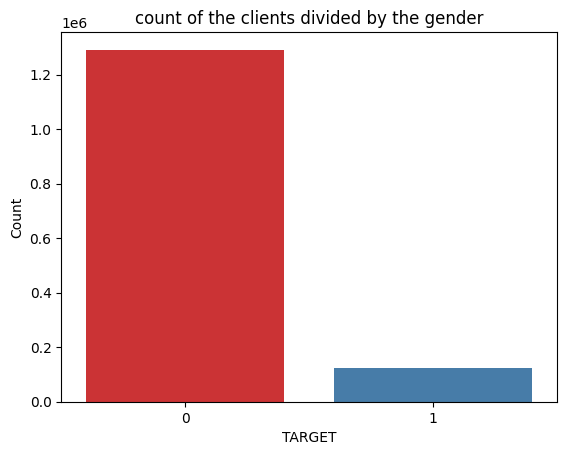

In [157]:
sns.countplot(x='TARGET', data=merged_copy ,palette='Set1')
plt.title('count of the clients divided by the gender')
plt.xlabel('TARGET')
plt.ylabel('Count')
plt.show()

AS it apperes there is a massive difference between the Type of Target so<br> **0 which refers to no payment difficulties has 91.34%** of the whole data, Otherwise<br>  **1 refers to those facing difficulties in paying by 8.66%**

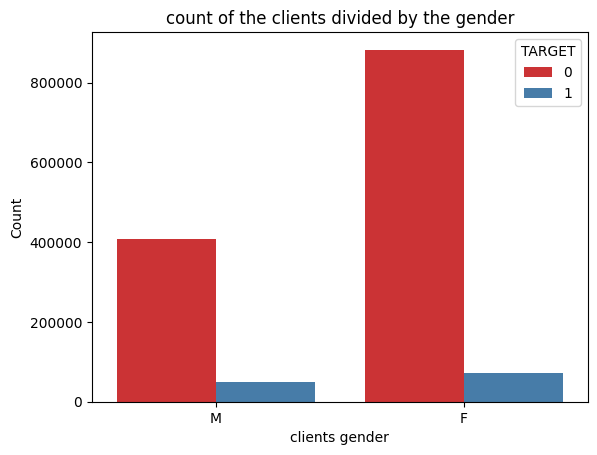

In [158]:
sns.countplot(x='CODE_GENDER', hue='TARGET', data=merged_copy ,palette='Set1')
plt.title('count of the clients divided by the gender')
plt.xlabel('clients gender')
plt.ylabel('Count')
plt.show()

Number of women applying for loans are greater than men as it is clarified !!

Which is the percentage of **Female** applied **67.56%   (955005) records** from the all applications.<br> And the remaining percentage **32.44%  (458382)records** for **Men**

## Categorical Univariate and bivariate analysis for target 0 (Which means clients have no payment difficulties)

### all the graphs below are talking about the people have no 

In [159]:
target_0_data = merged_copy[merged_copy['TARGET'] == 0]

# Display the resulting DataFrame
target_0_data.shape

(1291091, 71)

###  So the 91.34% of clients applying for loans and don't have payment difficulties


The percentage of **Female** that have no payment difficulties from all applied women clients is **92.37% (882203)records**

The percentage of **Male** that have no payment difficulties from all applied men clients is **89.20% (408888)records**

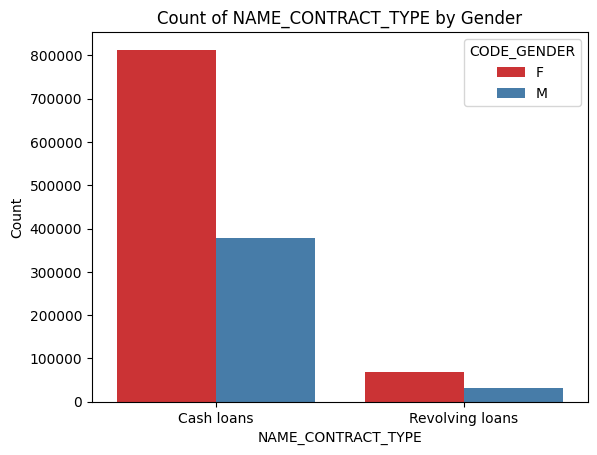

In [160]:
sns.countplot(x='NAME_CONTRACT_TYPE_x', hue='CODE_GENDER', data=target_0_data ,palette='Set1')
plt.title('Count of NAME_CONTRACT_TYPE by Gender')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count')
plt.show()

so as mentioned in the above graph the Cash loans are the common type that achieves clients need

the **Cash Loans** percentage is **92.19%** from all types and **Revolving loans** has the remaining values 


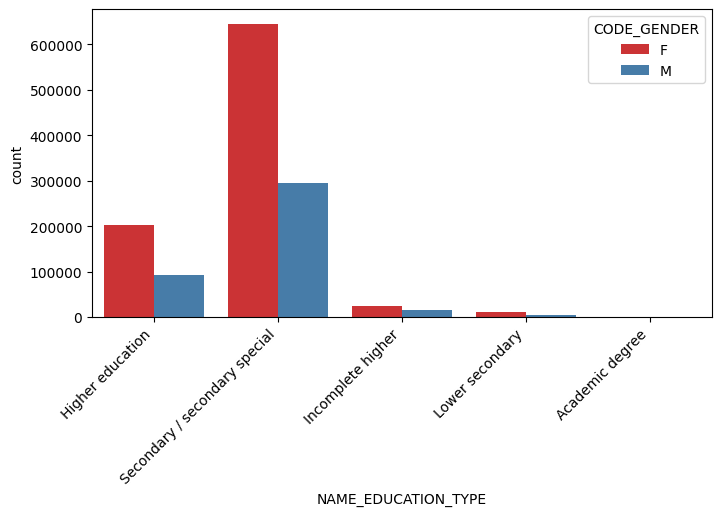

In [161]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', data=target_0_data , palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.show()

Most of applied application have **Secondary / secondary special** and **Higher education** by percentage of **95.58%**<br>
And the least types are **Academic degree** then **Lower secondary** by percentage of **1.22%**

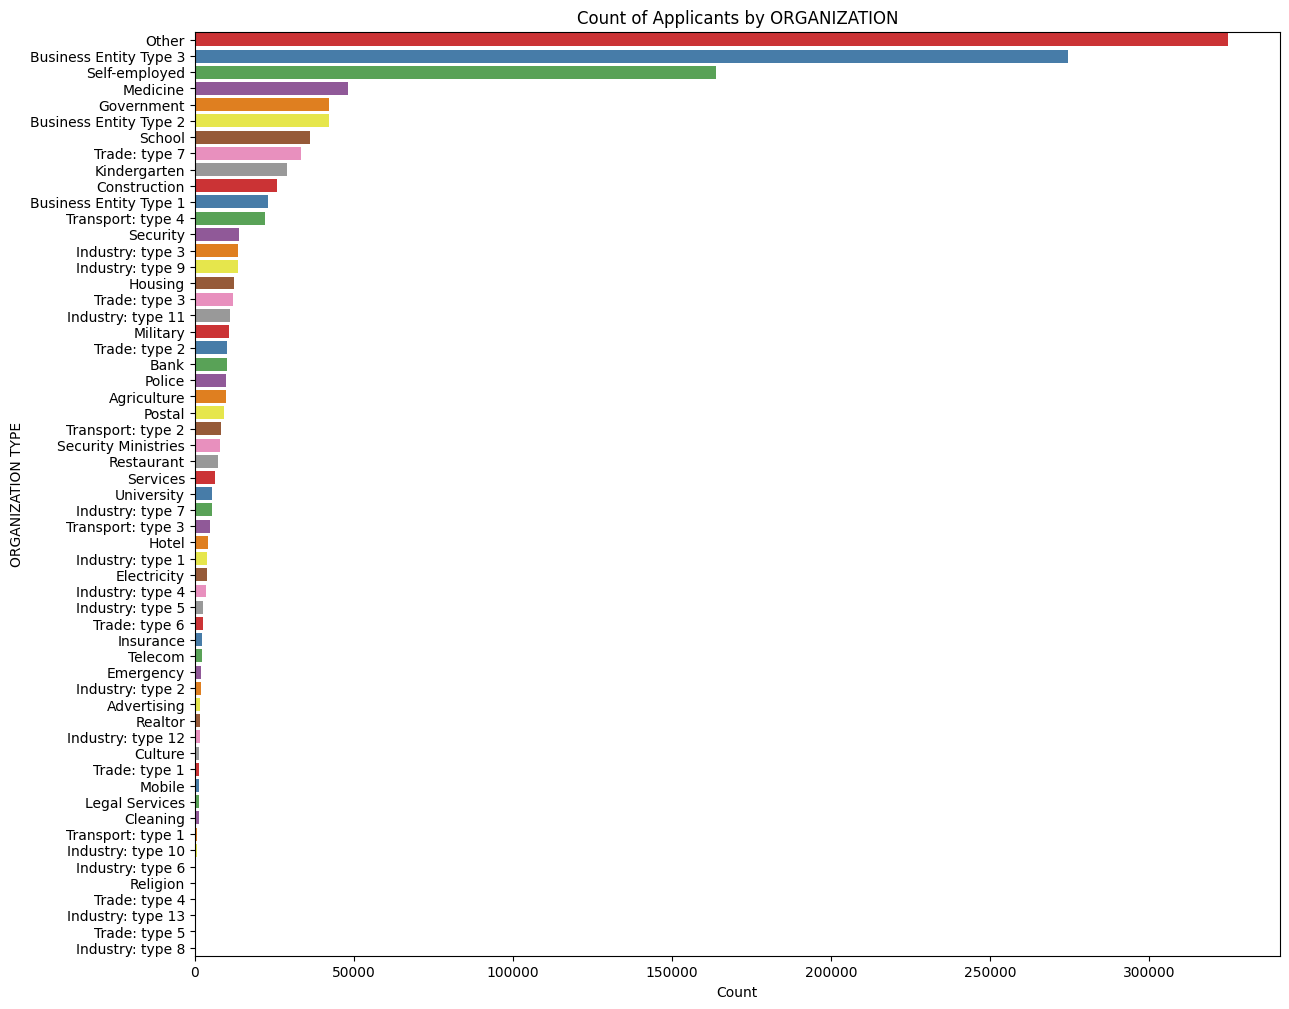

In [162]:
plt.figure(figsize=(14, 12))
sns.countplot(y='ORGANIZATION_TYPE', data=target_0_data, order=target_0_data['ORGANIZATION_TYPE'].value_counts().index ,palette='Set1')
plt.title('Count of Applicants by ORGANIZATION')
plt.xlabel('Count')
plt.ylabel('ORGANIZATION TYPE')
plt.show()

By the organization Type the most tpye applying with less payment difficulties **Business Entity Type 3 , Self-employed** by percentage of **34%** from all other organization Types which they are **57 type**

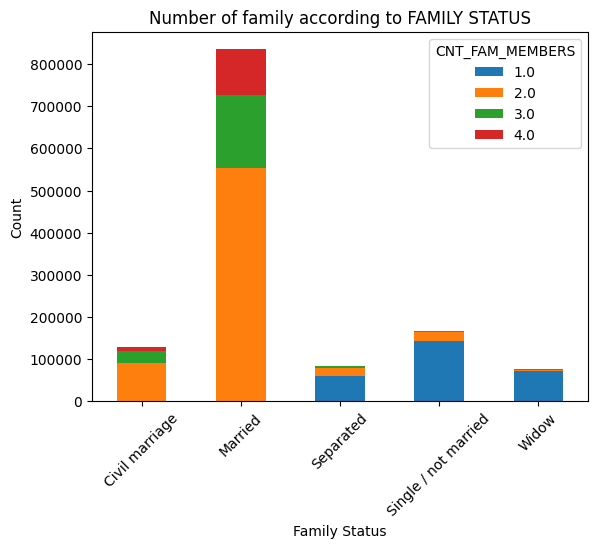

In [163]:
grouped_data = target_0_data.groupby(['NAME_FAMILY_STATUS', 'CNT_FAM_MEMBERS']).size().unstack()

# Plot the stacked bar graph
grouped_data.plot(kind='bar', stacked=True )

# Set the labels and title
plt.xlabel('Family Status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Number of family according to FAMILY STATUS')

# Show the plot
plt.show()

So **64.65%** of applied clients those have no payment difficulties are **Married** , And most of these percentage they have **NO Kids**<br>
However, The least percentage is **12.41%** for **Separated And Widow** Family Status

## Categorical Univariate and bivariate analysis for target 1 (Which means clients have payment difficulties)

In [164]:
target_1_data = merged_copy[merged_copy['TARGET'] == 1]

target_1_data.shape

(122296, 71)

###  So the 8.66% of clients applying for loans and have payment difficulties

The percentage of **Female** that have payment difficulties from all applied women clients is **7.62% (72802)records**

The percentage of **Male** that have payment difficulties from all applied men clients is **10.79% (49494)records**

<function matplotlib.pyplot.show(close=None, block=None)>

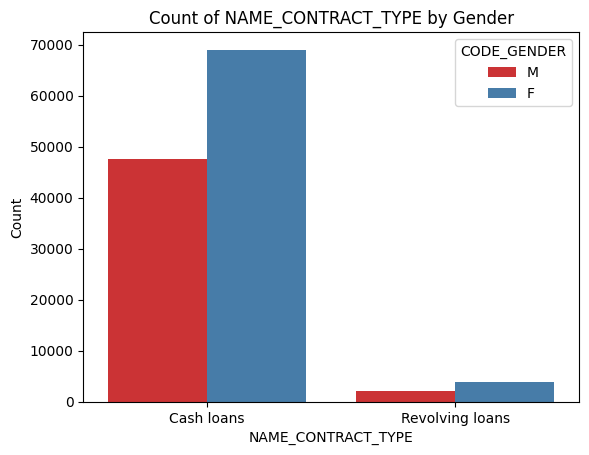

In [165]:
sns.countplot(x='NAME_CONTRACT_TYPE_x', hue='CODE_GENDER', data=target_1_data ,palette='Set1')
plt.title('Count of NAME_CONTRACT_TYPE by Gender')
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count')
plt.show

For those who have a payment difficulties the most of them applied for **Cash Loans** by percentage of **95.23%** (116468  of 122296 records)

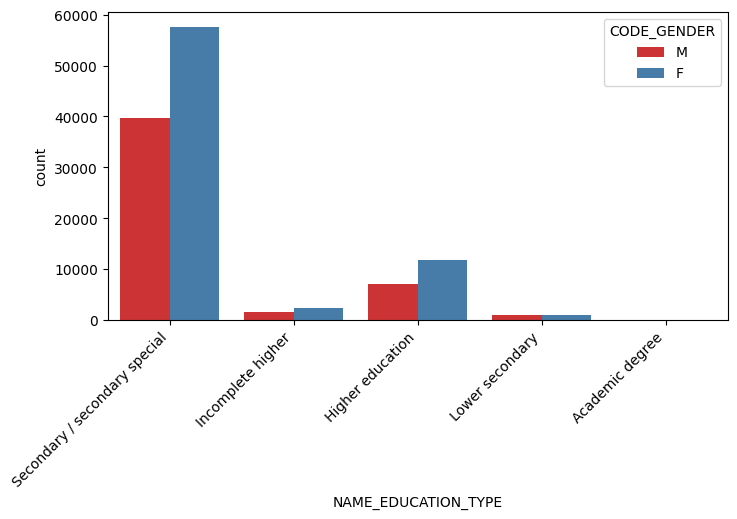

In [166]:
plt.figure(figsize=(8,4))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', data=target_1_data , palette='Set1')
plt.xticks(rotation=45, ha='right')
plt.show()

Most of applied application which have payment difficulties are **Secondary / secondary special** and **Higher education** by percentage of **95%**<br>
And the least types are **Academic degree** then **Lower secondary** by percentage of **1.53%**

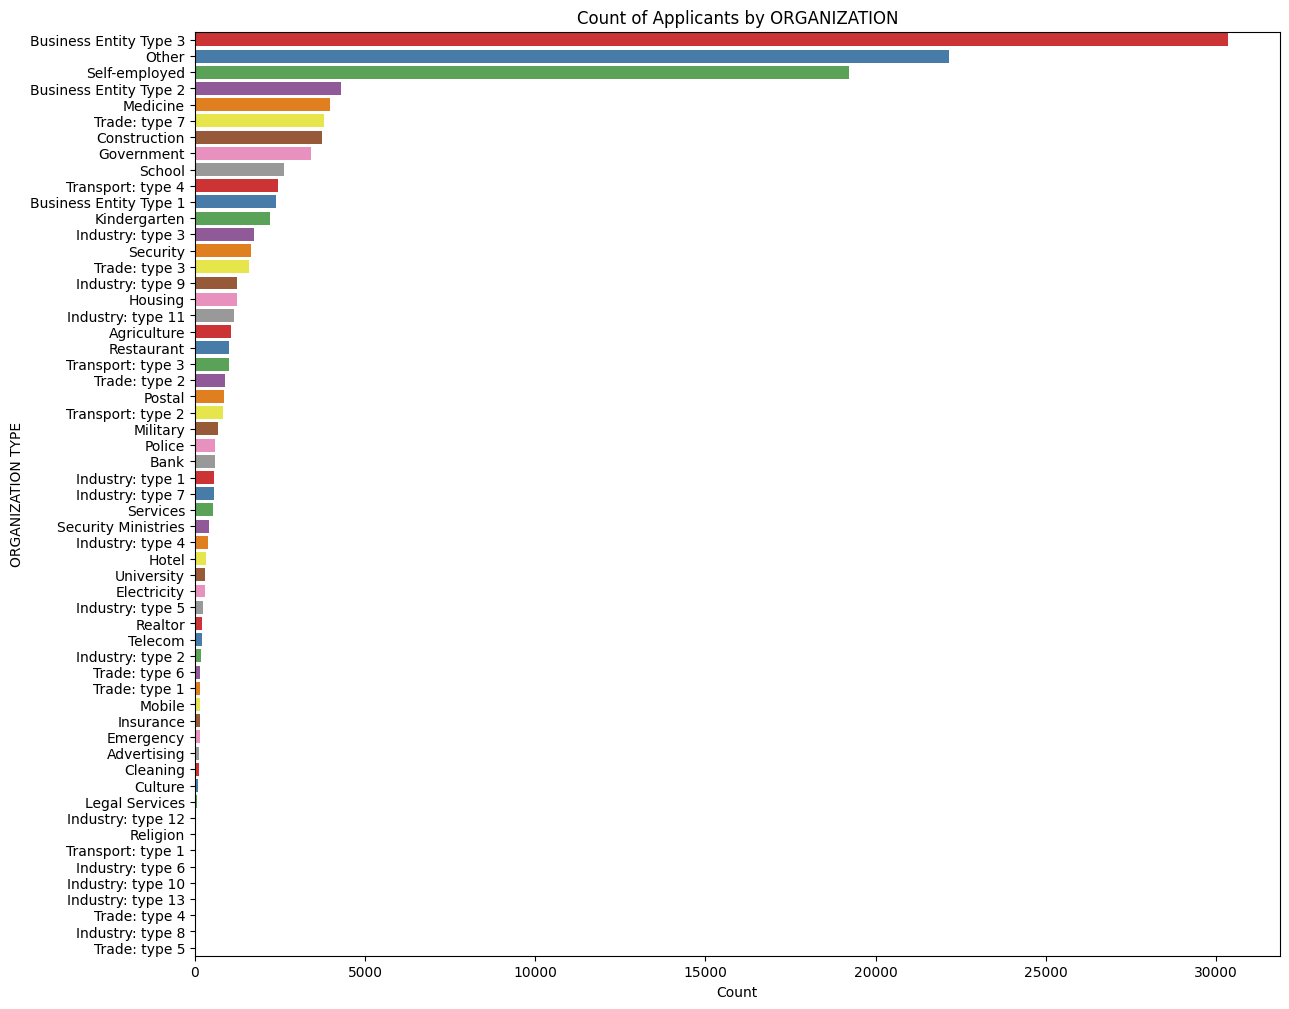

In [167]:
plt.figure(figsize=(14, 12))
sns.countplot(y='ORGANIZATION_TYPE', data=target_1_data, order=target_1_data['ORGANIZATION_TYPE'].value_counts().index ,palette='Set1')
plt.title('Count of Applicants by ORGANIZATION')
plt.xlabel('Count')
plt.ylabel('ORGANIZATION TYPE')
plt.show()

By the organization Type the most tpye applying with payment difficulties **Business Entity Type 3 , Self-employed** by percentage of **40.51%** from all other organization Types 

## Numerical Correlation with Target 0

In [168]:
selected_features = ['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',]

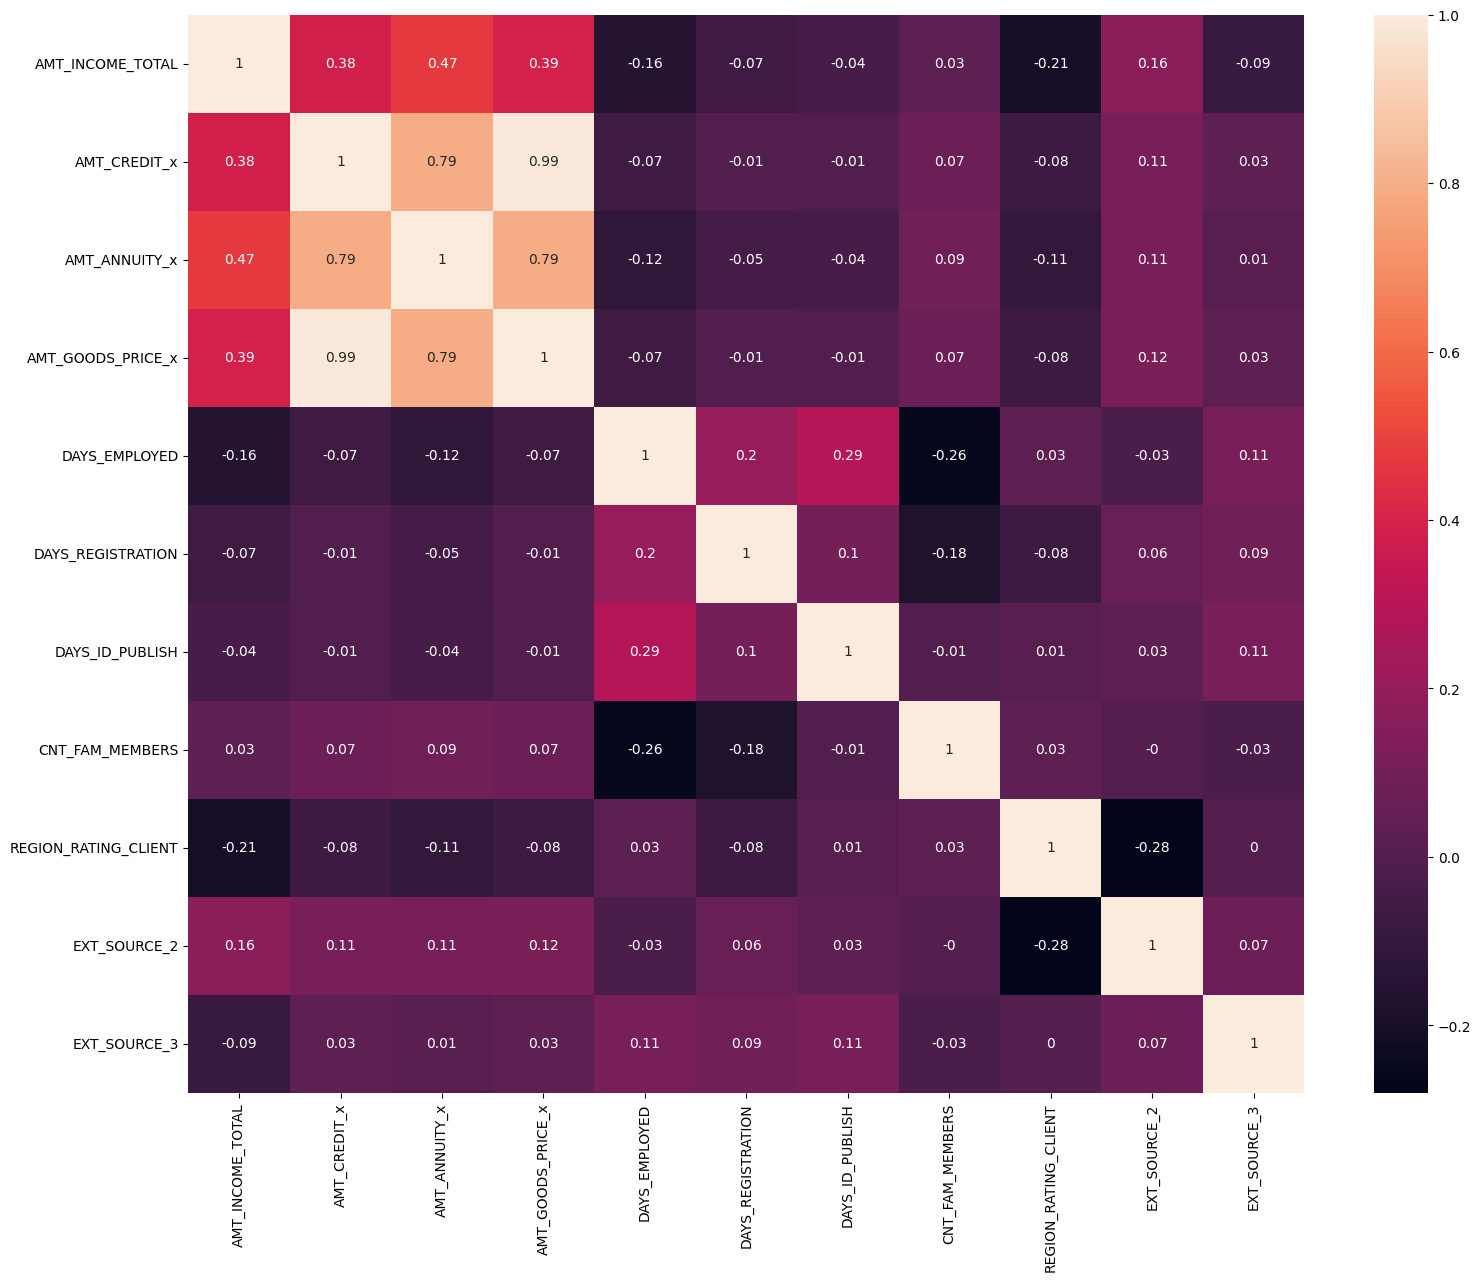

In [169]:
# Create a correlation matrix
corr_matrix = target_0_data[selected_features].corr().round(2)

# Create a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True)

# Display the heatmap
plt.show()

## Numerical Correlation with Target 1

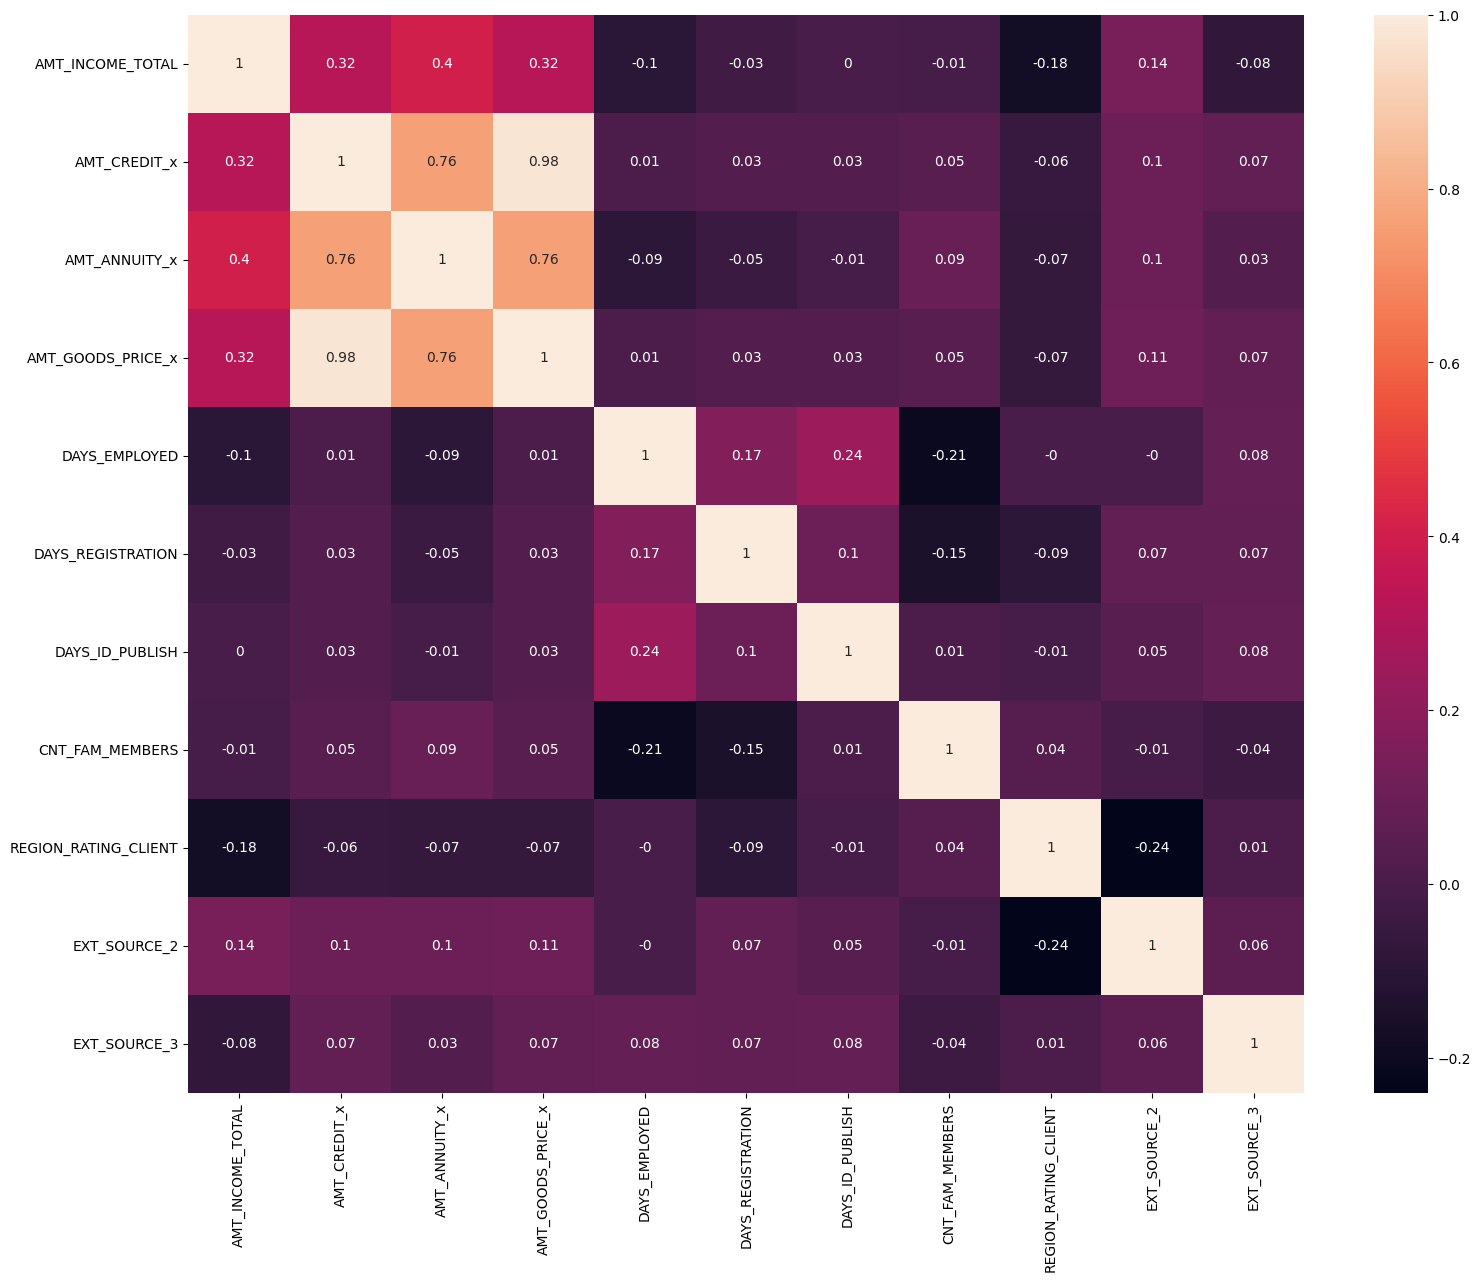

In [171]:
# Create a correlation matrix
corr_matrix = target_1_data[selected_features].corr().round(2)

# Create a heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True)

# Display the heatmap
plt.show()